# 1. Import libraries

In [46]:
import os
import csv
import gzip
import collections
import re
import io
import json
import xml.etree.ElementTree as ET
import requests
import pandas as pd
import xmlschema
from pprint import pprint
import zipfile
import copy

# 2. Unzip data

In [4]:
# zip_ref = zipfile.ZipFile('./faers_xml_2018q4.zip', 'r')
# zip_ref.extractall('./')
# zip_ref.close()

# 3. Read xml file and parse it

In [2]:
xml_path = os.path.join(os.path.curdir, './xml/1_ADR18Q4.xml')
tree = ET.parse(xml_path)

In [3]:
root = tree.getroot()

In [5]:
for item in root:
    print(item)

<Element 'ichicsrmessageheader' at 0x121f89228>
<Element 'safetyreport' at 0x121f89548>
<Element 'safetyreport' at 0x121f908b8>
<Element 'safetyreport' at 0x121f94c78>
<Element 'safetyreport' at 0x121fa3778>
<Element 'safetyreport' at 0x121fa59a8>
<Element 'safetyreport' at 0x121fad278>
<Element 'safetyreport' at 0x121fb2a98>
<Element 'safetyreport' at 0x121fb85e8>
<Element 'safetyreport' at 0x121fbcae8>
<Element 'safetyreport' at 0x121fbfe08>
<Element 'safetyreport' at 0x121fc3e58>
<Element 'safetyreport' at 0x121fc9368>
<Element 'safetyreport' at 0x121fcc368>
<Element 'safetyreport' at 0x121fd29a8>
<Element 'safetyreport' at 0x121fd6c28>
<Element 'safetyreport' at 0x121fdc278>
<Element 'safetyreport' at 0x121fe1458>
<Element 'safetyreport' at 0x121fe47c8>
<Element 'safetyreport' at 0x121fe7728>
<Element 'safetyreport' at 0x121fea9a8>
<Element 'safetyreport' at 0x121fee908>
<Element 'safetyreport' at 0x121ff1a98>
<Element 'safetyreport' at 0x121ff84a8>
<Element 'safetyreport' at 0x121

<Element 'safetyreport' at 0x124ecb098>
<Element 'safetyreport' at 0x124ece188>
<Element 'safetyreport' at 0x124ed6908>
<Element 'safetyreport' at 0x124ee0728>
<Element 'safetyreport' at 0x124ee4548>
<Element 'safetyreport' at 0x124ee6638>
<Element 'safetyreport' at 0x124eed868>
<Element 'safetyreport' at 0x124ef09f8>
<Element 'safetyreport' at 0x124ef3c28>
<Element 'safetyreport' at 0x124ef9db8>
<Element 'safetyreport' at 0x124efdcc8>
<Element 'safetyreport' at 0x124f03728>
<Element 'safetyreport' at 0x124f0b278>
<Element 'safetyreport' at 0x124f0fd68>
<Element 'safetyreport' at 0x124f19728>
<Element 'safetyreport' at 0x124f23728>
<Element 'safetyreport' at 0x124f26598>
<Element 'safetyreport' at 0x124f2ba48>
<Element 'safetyreport' at 0x124f2ea48>
<Element 'safetyreport' at 0x124f31b88>
<Element 'safetyreport' at 0x124f38138>
<Element 'safetyreport' at 0x124f3e598>
<Element 'safetyreport' at 0x124f479f8>
<Element 'safetyreport' at 0x124f4f728>
<Element 'safetyreport' at 0x124f559a8>


<Element 'safetyreport' at 0x12792d228>
<Element 'safetyreport' at 0x1279321d8>
<Element 'safetyreport' at 0x12793e8b8>
<Element 'safetyreport' at 0x127945228>
<Element 'safetyreport' at 0x127949ae8>
<Element 'safetyreport' at 0x12794dc78>
<Element 'safetyreport' at 0x127954e58>
<Element 'safetyreport' at 0x12795ecc8>
<Element 'safetyreport' at 0x12796d048>
<Element 'safetyreport' at 0x127974868>
<Element 'safetyreport' at 0x12798d688>
<Element 'safetyreport' at 0x127995228>
<Element 'safetyreport' at 0x12799d188>
<Element 'safetyreport' at 0x1279a4188>
<Element 'safetyreport' at 0x1279a7048>
<Element 'safetyreport' at 0x1279aab38>
<Element 'safetyreport' at 0x1279b5728>
<Element 'safetyreport' at 0x1279bc278>
<Element 'safetyreport' at 0x1279ce368>
<Element 'safetyreport' at 0x1279d1a48>
<Element 'safetyreport' at 0x1279e9728>
<Element 'safetyreport' at 0x1279f14a8>
<Element 'safetyreport' at 0x1279f70e8>
<Element 'safetyreport' at 0x127a09a48>
<Element 'safetyreport' at 0x127a16cc8>


<Element 'safetyreport' at 0x12ad407c8>
<Element 'safetyreport' at 0x12ad48908>
<Element 'safetyreport' at 0x12ad53728>
<Element 'safetyreport' at 0x12ad579f8>
<Element 'safetyreport' at 0x12ad64098>
<Element 'safetyreport' at 0x12ad67598>
<Element 'safetyreport' at 0x12ad6a368>
<Element 'safetyreport' at 0x12ad6dea8>
<Element 'safetyreport' at 0x12ad72f48>
<Element 'safetyreport' at 0x12ad75ea8>
<Element 'safetyreport' at 0x12ad78d68>
<Element 'safetyreport' at 0x12ad7cf48>
<Element 'safetyreport' at 0x12ad80db8>
<Element 'safetyreport' at 0x12ad84d18>
<Element 'safetyreport' at 0x12ad8a4f8>
<Element 'safetyreport' at 0x12ad8e368>
<Element 'safetyreport' at 0x12ad92318>
<Element 'safetyreport' at 0x12ad949a8>
<Element 'safetyreport' at 0x12ad99e08>
<Element 'safetyreport' at 0x12ada9958>
<Element 'safetyreport' at 0x12adb5458>
<Element 'safetyreport' at 0x12adbb408>
<Element 'safetyreport' at 0x12adbf408>
<Element 'safetyreport' at 0x12adc9bd8>
<Element 'safetyreport' at 0x12add1188>


<Element 'safetyreport' at 0x12e28f188>
<Element 'safetyreport' at 0x12e2926d8>
<Element 'safetyreport' at 0x12e295868>
<Element 'safetyreport' at 0x12e29a728>
<Element 'safetyreport' at 0x12e29db88>
<Element 'safetyreport' at 0x12e2a0c78>
<Element 'safetyreport' at 0x12e2a84f8>
<Element 'safetyreport' at 0x12e2ab318>
<Element 'safetyreport' at 0x12e2af188>
<Element 'safetyreport' at 0x12e2b2138>
<Element 'safetyreport' at 0x12e2b6278>
<Element 'safetyreport' at 0x12e2b9688>
<Element 'safetyreport' at 0x12e2c1188>
<Element 'safetyreport' at 0x12e2c1f48>
<Element 'safetyreport' at 0x12e2cc9f8>
<Element 'safetyreport' at 0x12e2cfdb8>
<Element 'safetyreport' at 0x12e2d3e08>
<Element 'safetyreport' at 0x12e2e2f98>
<Element 'safetyreport' at 0x12e2ea408>
<Element 'safetyreport' at 0x12e2ed728>
<Element 'safetyreport' at 0x12e2fc048>
<Element 'safetyreport' at 0x12e301188>
<Element 'safetyreport' at 0x12e308ea8>
<Element 'safetyreport' at 0x12e30ed68>
<Element 'safetyreport' at 0x12e312e08>


<Element 'safetyreport' at 0x130938818>
<Element 'safetyreport' at 0x13093b818>
<Element 'safetyreport' at 0x13093f9a8>
<Element 'safetyreport' at 0x130941ae8>
<Element 'safetyreport' at 0x130946e58>
<Element 'safetyreport' at 0x130949ea8>
<Element 'safetyreport' at 0x13094fa48>
<Element 'safetyreport' at 0x130954b38>
<Element 'safetyreport' at 0x130957e08>
<Element 'safetyreport' at 0x13095e638>
<Element 'safetyreport' at 0x130962548>
<Element 'safetyreport' at 0x130965f98>
<Element 'safetyreport' at 0x130975728>
<Element 'safetyreport' at 0x13097c598>
<Element 'safetyreport' at 0x13097f818>
<Element 'safetyreport' at 0x13098b688>
<Element 'safetyreport' at 0x13098e688>
<Element 'safetyreport' at 0x130991958>
<Element 'safetyreport' at 0x13099a048>
<Element 'safetyreport' at 0x13099c818>
<Element 'safetyreport' at 0x1309a4098>
<Element 'safetyreport' at 0x1309a75e8>
<Element 'safetyreport' at 0x1309ab368>
<Element 'safetyreport' at 0x1309b20e8>
<Element 'safetyreport' at 0x1309b60e8>


<Element 'safetyreport' at 0x1338cc818>
<Element 'safetyreport' at 0x1338d2188>
<Element 'safetyreport' at 0x1338ebdb8>
<Element 'safetyreport' at 0x1338f12c8>
<Element 'safetyreport' at 0x1338f9598>
<Element 'safetyreport' at 0x1338ff7c8>
<Element 'safetyreport' at 0x133903f98>
<Element 'safetyreport' at 0x13390b458>
<Element 'safetyreport' at 0x133912d18>
<Element 'safetyreport' at 0x133916ef8>
<Element 'safetyreport' at 0x13391c228>
<Element 'safetyreport' at 0x1339209f8>
<Element 'safetyreport' at 0x133931868>
<Element 'safetyreport' at 0x13393d7c8>
<Element 'safetyreport' at 0x133947868>
<Element 'safetyreport' at 0x133950688>
<Element 'safetyreport' at 0x13395e638>
<Element 'safetyreport' at 0x1339658b8>
<Element 'safetyreport' at 0x13396ae08>
<Element 'safetyreport' at 0x133978368>
<Element 'safetyreport' at 0x13397c8b8>
<Element 'safetyreport' at 0x133999a98>
<Element 'safetyreport' at 0x1339a0f48>
<Element 'safetyreport' at 0x1339ab0e8>
<Element 'safetyreport' at 0x1339afd18>


<Element 'safetyreport' at 0x1363cd9f8>
<Element 'safetyreport' at 0x1363d1c78>
<Element 'safetyreport' at 0x1363d8c78>
<Element 'safetyreport' at 0x1363e0b88>
<Element 'safetyreport' at 0x1363e6188>
<Element 'safetyreport' at 0x1363ea598>
<Element 'safetyreport' at 0x1363ee408>
<Element 'safetyreport' at 0x1363f1318>
<Element 'safetyreport' at 0x1363f54a8>
<Element 'safetyreport' at 0x1363f78b8>
<Element 'safetyreport' at 0x1363fbb38>
<Element 'safetyreport' at 0x1363ffc28>
<Element 'safetyreport' at 0x136403b38>
<Element 'safetyreport' at 0x136409598>
<Element 'safetyreport' at 0x13640ee58>
<Element 'safetyreport' at 0x1364154a8>
<Element 'safetyreport' at 0x136418778>
<Element 'safetyreport' at 0x13641c778>
<Element 'safetyreport' at 0x136421868>
<Element 'safetyreport' at 0x136424f48>
<Element 'safetyreport' at 0x136428ef8>
<Element 'safetyreport' at 0x13642ce08>
<Element 'safetyreport' at 0x13642fe58>
<Element 'safetyreport' at 0x136433f98>
<Element 'safetyreport' at 0x1364398b8>


<Element 'safetyreport' at 0x138923688>
<Element 'safetyreport' at 0x1389278b8>
<Element 'safetyreport' at 0x138929bd8>
<Element 'safetyreport' at 0x13892dbd8>
<Element 'safetyreport' at 0x1389319a8>
<Element 'safetyreport' at 0x1389359f8>
<Element 'safetyreport' at 0x138937a98>
<Element 'safetyreport' at 0x13893fe08>
<Element 'safetyreport' at 0x138942db8>
<Element 'safetyreport' at 0x1389573b8>
<Element 'safetyreport' at 0x13895c4f8>
<Element 'safetyreport' at 0x13895f408>
<Element 'safetyreport' at 0x138962a48>
<Element 'safetyreport' at 0x138967b88>
<Element 'safetyreport' at 0x13896ad18>
<Element 'safetyreport' at 0x13896ee58>
<Element 'safetyreport' at 0x138973e58>
<Element 'safetyreport' at 0x138977d68>
<Element 'safetyreport' at 0x13897acc8>
<Element 'safetyreport' at 0x1389821d8>
<Element 'safetyreport' at 0x138985778>
<Element 'safetyreport' at 0x1389932c8>
<Element 'safetyreport' at 0x13899f458>
<Element 'safetyreport' at 0x1389a2278>
<Element 'safetyreport' at 0x1389a5ae8>


<Element 'safetyreport' at 0x13a8c7bd8>
<Element 'safetyreport' at 0x13a8cae08>
<Element 'safetyreport' at 0x13a8cfc28>
<Element 'safetyreport' at 0x13a8d2b88>
<Element 'safetyreport' at 0x13a8d5ae8>
<Element 'safetyreport' at 0x13a8d8ef8>
<Element 'safetyreport' at 0x13a8e04a8>
<Element 'safetyreport' at 0x13a8e4368>
<Element 'safetyreport' at 0x13a8e6958>
<Element 'safetyreport' at 0x13a8ebea8>
<Element 'safetyreport' at 0x13a8f1458>
<Element 'safetyreport' at 0x13a8f5ea8>
<Element 'safetyreport' at 0x13a8fcf98>
<Element 'safetyreport' at 0x13a900e58>
<Element 'safetyreport' at 0x13a906318>
<Element 'safetyreport' at 0x13a912c28>
<Element 'safetyreport' at 0x13a9195e8>
<Element 'safetyreport' at 0x13a91e548>
<Element 'safetyreport' at 0x13a925638>
<Element 'safetyreport' at 0x13a9279f8>
<Element 'safetyreport' at 0x13a92cf98>
<Element 'safetyreport' at 0x13a932138>
<Element 'safetyreport' at 0x13a9352c8>
<Element 'safetyreport' at 0x13a93a458>
<Element 'safetyreport' at 0x13a93da48>


<Element 'safetyreport' at 0x13d4d3818>
<Element 'safetyreport' at 0x13d4d7908>
<Element 'safetyreport' at 0x13d4dd408>
<Element 'safetyreport' at 0x13d4e1f98>
<Element 'safetyreport' at 0x13d4e9408>
<Element 'safetyreport' at 0x13d4fb908>
<Element 'safetyreport' at 0x13d507d18>
<Element 'safetyreport' at 0x13d50d598>
<Element 'safetyreport' at 0x13d5149a8>
<Element 'safetyreport' at 0x13d518a48>
<Element 'safetyreport' at 0x13d51bc78>
<Element 'safetyreport' at 0x13d5258b8>
<Element 'safetyreport' at 0x13d52bb88>
<Element 'safetyreport' at 0x13d52fea8>
<Element 'safetyreport' at 0x13d536f48>
<Element 'safetyreport' at 0x13d53cc28>
<Element 'safetyreport' at 0x13d54aa48>
<Element 'safetyreport' at 0x13d555868>
<Element 'safetyreport' at 0x13d55ae58>
<Element 'safetyreport' at 0x13d562408>
<Element 'safetyreport' at 0x13d5655e8>
<Element 'safetyreport' at 0x13d568778>
<Element 'safetyreport' at 0x13d56b9a8>
<Element 'safetyreport' at 0x13d56fa48>
<Element 'safetyreport' at 0x13d572ae8>


<Element 'safetyreport' at 0x14082cb88>
<Element 'safetyreport' at 0x140832728>
<Element 'safetyreport' at 0x1408379a8>
<Element 'safetyreport' at 0x14083a868>
<Element 'safetyreport' at 0x14083d868>
<Element 'safetyreport' at 0x140840cc8>
<Element 'safetyreport' at 0x140849f98>
<Element 'safetyreport' at 0x1408504a8>
<Element 'safetyreport' at 0x140857048>
<Element 'safetyreport' at 0x140861a48>
<Element 'safetyreport' at 0x140867b88>
<Element 'safetyreport' at 0x14086d138>
<Element 'safetyreport' at 0x140873a48>
<Element 'safetyreport' at 0x14087fc28>
<Element 'safetyreport' at 0x140889ef8>
<Element 'safetyreport' at 0x14088ee08>
<Element 'safetyreport' at 0x140891ef8>
<Element 'safetyreport' at 0x140899138>
<Element 'safetyreport' at 0x14089c188>
<Element 'safetyreport' at 0x14089f638>
<Element 'safetyreport' at 0x1408a39f8>
<Element 'safetyreport' at 0x1408ab4f8>
<Element 'safetyreport' at 0x1408ae728>
<Element 'safetyreport' at 0x1408b3688>
<Element 'safetyreport' at 0x1408b68b8>


<Element 'safetyreport' at 0x144055a48>
<Element 'safetyreport' at 0x14405c0e8>
<Element 'safetyreport' at 0x144065138>
<Element 'safetyreport' at 0x14406fd18>
<Element 'safetyreport' at 0x144079db8>
<Element 'safetyreport' at 0x144085228>
<Element 'safetyreport' at 0x14408cd68>
<Element 'safetyreport' at 0x14409f638>
<Element 'safetyreport' at 0x1440a9138>
<Element 'safetyreport' at 0x1440ad188>
<Element 'safetyreport' at 0x1440b0408>
<Element 'safetyreport' at 0x1440ba958>
<Element 'safetyreport' at 0x1440bdc78>
<Element 'safetyreport' at 0x1440d3368>
<Element 'safetyreport' at 0x1440d65e8>
<Element 'safetyreport' at 0x1440e0868>
<Element 'safetyreport' at 0x1440e4818>
<Element 'safetyreport' at 0x1440e77c8>
<Element 'safetyreport' at 0x1440ef098>
<Element 'safetyreport' at 0x1440fa278>
<Element 'safetyreport' at 0x1440fd868>
<Element 'safetyreport' at 0x144102a98>
<Element 'safetyreport' at 0x144105c28>
<Element 'safetyreport' at 0x14410f368>
<Element 'safetyreport' at 0x144114278>


<Element 'safetyreport' at 0x146803d68>
<Element 'safetyreport' at 0x14680b408>
<Element 'safetyreport' at 0x14680fc28>
<Element 'safetyreport' at 0x146813cc8>
<Element 'safetyreport' at 0x146819ef8>
<Element 'safetyreport' at 0x146821ea8>
<Element 'safetyreport' at 0x14682b9a8>
<Element 'safetyreport' at 0x1468323b8>
<Element 'safetyreport' at 0x146835548>
<Element 'safetyreport' at 0x14684ae58>
<Element 'safetyreport' at 0x146854138>
<Element 'safetyreport' at 0x1468564a8>
<Element 'safetyreport' at 0x14685a408>
<Element 'safetyreport' at 0x146861318>
<Element 'safetyreport' at 0x146864bd8>
<Element 'safetyreport' at 0x14686cf98>
<Element 'safetyreport' at 0x146873ef8>
<Element 'safetyreport' at 0x146881958>
<Element 'safetyreport' at 0x146885db8>
<Element 'safetyreport' at 0x14688c1d8>
<Element 'safetyreport' at 0x146894278>
<Element 'safetyreport' at 0x146897778>
<Element 'safetyreport' at 0x14689adb8>
<Element 'safetyreport' at 0x1468a2f98>
<Element 'safetyreport' at 0x1468a8778>


<Element 'safetyreport' at 0x1490de728>
<Element 'safetyreport' at 0x1490f5598>
<Element 'safetyreport' at 0x1490f94a8>
<Element 'safetyreport' at 0x1490fd5e8>
<Element 'safetyreport' at 0x1491071d8>
<Element 'safetyreport' at 0x14910d598>
<Element 'safetyreport' at 0x149115db8>
<Element 'safetyreport' at 0x149139b38>
<Element 'safetyreport' at 0x149142868>
<Element 'safetyreport' at 0x14914c368>
<Element 'safetyreport' at 0x14915e638>
<Element 'safetyreport' at 0x1491711d8>
<Element 'safetyreport' at 0x14917f778>
<Element 'safetyreport' at 0x149196db8>
<Element 'safetyreport' at 0x14919c408>
<Element 'safetyreport' at 0x1491b0a48>
<Element 'safetyreport' at 0x1491bd5e8>
<Element 'safetyreport' at 0x1491d1458>
<Element 'safetyreport' at 0x1491d8908>
<Element 'safetyreport' at 0x1491df098>
<Element 'safetyreport' at 0x1491e42c8>
<Element 'safetyreport' at 0x1491f32c8>
<Element 'safetyreport' at 0x1491fd7c8>
<Element 'safetyreport' at 0x149214d18>
<Element 'safetyreport' at 0x14921ee08>


<Element 'safetyreport' at 0x14cf71d68>
<Element 'safetyreport' at 0x14cf75d68>
<Element 'safetyreport' at 0x14cf7d098>
<Element 'safetyreport' at 0x14cf80818>
<Element 'safetyreport' at 0x14cf887c8>
<Element 'safetyreport' at 0x14cf90e08>
<Element 'safetyreport' at 0x14cf9a7c8>
<Element 'safetyreport' at 0x14cf9da98>
<Element 'safetyreport' at 0x14cfa5318>
<Element 'safetyreport' at 0x14cfa9598>
<Element 'safetyreport' at 0x14cfad638>
<Element 'safetyreport' at 0x14cfb44f8>
<Element 'safetyreport' at 0x14cfbb228>
<Element 'safetyreport' at 0x14cfc97c8>
<Element 'safetyreport' at 0x14cfce958>
<Element 'safetyreport' at 0x14cfd0d18>
<Element 'safetyreport' at 0x14cfe7db8>
<Element 'safetyreport' at 0x14cfee728>
<Element 'safetyreport' at 0x14cff26d8>
<Element 'safetyreport' at 0x14cff7c28>
<Element 'safetyreport' at 0x14cffdbd8>
<Element 'safetyreport' at 0x14d004458>
<Element 'safetyreport' at 0x14d009368>
<Element 'safetyreport' at 0x14d00b2c8>
<Element 'safetyreport' at 0x14d00f5e8>


<Element 'safetyreport' at 0x150f28688>
<Element 'safetyreport' at 0x150f2c868>
<Element 'safetyreport' at 0x150f31ae8>
<Element 'safetyreport' at 0x150f37ae8>
<Element 'safetyreport' at 0x150f40d68>
<Element 'safetyreport' at 0x150f47138>
<Element 'safetyreport' at 0x150f4fd68>
<Element 'safetyreport' at 0x150f567c8>
<Element 'safetyreport' at 0x150f5ce08>
<Element 'safetyreport' at 0x150f64048>
<Element 'safetyreport' at 0x150f6abd8>
<Element 'safetyreport' at 0x150f77d18>
<Element 'safetyreport' at 0x150f7e548>
<Element 'safetyreport' at 0x150f829a8>
<Element 'safetyreport' at 0x150f84a98>
<Element 'safetyreport' at 0x150f8b958>
<Element 'safetyreport' at 0x150f8fd18>
<Element 'safetyreport' at 0x150f982c8>
<Element 'safetyreport' at 0x150fa0f48>
<Element 'safetyreport' at 0x150faa0e8>
<Element 'safetyreport' at 0x150faaef8>
<Element 'safetyreport' at 0x150faeea8>
<Element 'safetyreport' at 0x150fb50e8>
<Element 'safetyreport' at 0x150fb9098>
<Element 'safetyreport' at 0x150fb9f48>


<Element 'safetyreport' at 0x153ff1368>
<Element 'safetyreport' at 0x153ff55e8>
<Element 'safetyreport' at 0x153ffa4f8>
<Element 'safetyreport' at 0x153ffe9f8>
<Element 'safetyreport' at 0x1540070e8>
<Element 'safetyreport' at 0x15400d6d8>
<Element 'safetyreport' at 0x154010778>
<Element 'safetyreport' at 0x154012598>
<Element 'safetyreport' at 0x154016598>
<Element 'safetyreport' at 0x15401ce08>
<Element 'safetyreport' at 0x1540234a8>
<Element 'safetyreport' at 0x1540266d8>
<Element 'safetyreport' at 0x154029638>
<Element 'safetyreport' at 0x15402d548>
<Element 'safetyreport' at 0x154030548>
<Element 'safetyreport' at 0x1540346d8>
<Element 'safetyreport' at 0x154037868>
<Element 'safetyreport' at 0x15403b9f8>
<Element 'safetyreport' at 0x15403eb38>
<Element 'safetyreport' at 0x154041cc8>
<Element 'safetyreport' at 0x154048a48>
<Element 'safetyreport' at 0x15404ce58>
<Element 'safetyreport' at 0x154052228>
<Element 'safetyreport' at 0x154056548>
<Element 'safetyreport' at 0x15405b4f8>


<Element 'safetyreport' at 0x1579bb6d8>
<Element 'safetyreport' at 0x1579bea48>
<Element 'safetyreport' at 0x1579c2d18>
<Element 'safetyreport' at 0x1579c9ef8>
<Element 'safetyreport' at 0x1579cf098>
<Element 'safetyreport' at 0x1579d32c8>
<Element 'safetyreport' at 0x1579d7bd8>
<Element 'safetyreport' at 0x1579dadb8>
<Element 'safetyreport' at 0x1579e1688>
<Element 'safetyreport' at 0x1579e8098>
<Element 'safetyreport' at 0x1579eb598>
<Element 'safetyreport' at 0x1579ef5e8>
<Element 'safetyreport' at 0x1579f18b8>
<Element 'safetyreport' at 0x1579f78b8>
<Element 'safetyreport' at 0x1579fd728>
<Element 'safetyreport' at 0x157a016d8>
<Element 'safetyreport' at 0x157a0d7c8>
<Element 'safetyreport' at 0x157a0f638>
<Element 'safetyreport' at 0x157a18ea8>
<Element 'safetyreport' at 0x157a1e278>
<Element 'safetyreport' at 0x157a21638>
<Element 'safetyreport' at 0x157a2aef8>
<Element 'safetyreport' at 0x157a2cd18>
<Element 'safetyreport' at 0x157a374a8>
<Element 'safetyreport' at 0x157a3b4f8>


<Element 'safetyreport' at 0x15c251b38>
<Element 'safetyreport' at 0x15c254e08>
<Element 'safetyreport' at 0x15c25b278>
<Element 'safetyreport' at 0x15c25e278>
<Element 'safetyreport' at 0x15c2629a8>
<Element 'safetyreport' at 0x15c26d1d8>
<Element 'safetyreport' at 0x15c271908>
<Element 'safetyreport' at 0x15c275cc8>
<Element 'safetyreport' at 0x15c284188>
<Element 'safetyreport' at 0x15c2864f8>
<Element 'safetyreport' at 0x15c28ea98>
<Element 'safetyreport' at 0x15c298188>
<Element 'safetyreport' at 0x15c29c688>
<Element 'safetyreport' at 0x15c2a40e8>
<Element 'safetyreport' at 0x15c2a9c28>
<Element 'safetyreport' at 0x15c2b1188>
<Element 'safetyreport' at 0x15c2b51d8>
<Element 'safetyreport' at 0x15c2b9278>
<Element 'safetyreport' at 0x15c2bd1d8>
<Element 'safetyreport' at 0x15c2c1a48>
<Element 'safetyreport' at 0x15c2c3d18>
<Element 'safetyreport' at 0x15c2c7d68>
<Element 'safetyreport' at 0x15c2cf3b8>
<Element 'safetyreport' at 0x15c2d8f48>
<Element 'safetyreport' at 0x15c2e3138>


<Element 'safetyreport' at 0x160604138>
<Element 'safetyreport' at 0x1606074f8>
<Element 'safetyreport' at 0x16060a778>
<Element 'safetyreport' at 0x160619598>
<Element 'safetyreport' at 0x16061d958>
<Element 'safetyreport' at 0x16062bcc8>
<Element 'safetyreport' at 0x16062ef48>
<Element 'safetyreport' at 0x16063a3b8>
<Element 'safetyreport' at 0x16063d638>
<Element 'safetyreport' at 0x160641688>
<Element 'safetyreport' at 0x160644f48>
<Element 'safetyreport' at 0x160656958>
<Element 'safetyreport' at 0x16065be08>
<Element 'safetyreport' at 0x16066c138>
<Element 'safetyreport' at 0x1606733b8>
<Element 'safetyreport' at 0x160677728>
<Element 'safetyreport' at 0x16067e228>
<Element 'safetyreport' at 0x160682318>
<Element 'safetyreport' at 0x160689548>
<Element 'safetyreport' at 0x160691318>
<Element 'safetyreport' at 0x1606a1d68>
<Element 'safetyreport' at 0x1606a8098>
<Element 'safetyreport' at 0x1606ab2c8>
<Element 'safetyreport' at 0x1606af9a8>
<Element 'safetyreport' at 0x1606b63b8>


<Element 'safetyreport' at 0x164597f48>
<Element 'safetyreport' at 0x1645af8b8>
<Element 'safetyreport' at 0x1645c01d8>
<Element 'safetyreport' at 0x1645c8548>
<Element 'safetyreport' at 0x1645e1458>
<Element 'safetyreport' at 0x1645ef598>
<Element 'safetyreport' at 0x1645f2f98>
<Element 'safetyreport' at 0x164605cc8>
<Element 'safetyreport' at 0x16460f958>
<Element 'safetyreport' at 0x164616598>
<Element 'safetyreport' at 0x1646198b8>
<Element 'safetyreport' at 0x16461def8>
<Element 'safetyreport' at 0x1646383b8>
<Element 'safetyreport' at 0x164642368>
<Element 'safetyreport' at 0x164666318>
<Element 'safetyreport' at 0x164669598>
<Element 'safetyreport' at 0x164670318>
<Element 'safetyreport' at 0x16468e688>
<Element 'safetyreport' at 0x16469de58>
<Element 'safetyreport' at 0x1646eca98>
<Element 'safetyreport' at 0x1646efef8>
<Element 'safetyreport' at 0x164703778>
<Element 'safetyreport' at 0x164706ea8>
<Element 'safetyreport' at 0x164715278>
<Element 'safetyreport' at 0x1647262c8>


<Element 'safetyreport' at 0x167c15188>
<Element 'safetyreport' at 0x167c24728>
<Element 'safetyreport' at 0x167c396d8>
<Element 'safetyreport' at 0x167c469a8>
<Element 'safetyreport' at 0x167c50598>
<Element 'safetyreport' at 0x167c5dd18>
<Element 'safetyreport' at 0x167c687c8>
<Element 'safetyreport' at 0x167c6dd68>
<Element 'safetyreport' at 0x167c71e58>
<Element 'safetyreport' at 0x167c7aae8>
<Element 'safetyreport' at 0x167c7fd18>
<Element 'safetyreport' at 0x167c82ae8>
<Element 'safetyreport' at 0x167c85908>
<Element 'safetyreport' at 0x167c8d1d8>
<Element 'safetyreport' at 0x167c90408>
<Element 'safetyreport' at 0x167c93368>
<Element 'safetyreport' at 0x167c96818>
<Element 'safetyreport' at 0x167c9cc78>
<Element 'safetyreport' at 0x167ca5b38>
<Element 'safetyreport' at 0x167ca9ea8>
<Element 'safetyreport' at 0x167cb0228>
<Element 'safetyreport' at 0x167cb30e8>
<Element 'safetyreport' at 0x167cb7408>
<Element 'safetyreport' at 0x167cbe598>
<Element 'safetyreport' at 0x167cc24a8>


<Element 'safetyreport' at 0x16b876778>
<Element 'safetyreport' at 0x16b87cdb8>
<Element 'safetyreport' at 0x16b884048>
<Element 'safetyreport' at 0x16b887db8>
<Element 'safetyreport' at 0x16b88af98>
<Element 'safetyreport' at 0x16b8955e8>
<Element 'safetyreport' at 0x16b8a1098>
<Element 'safetyreport' at 0x16b8aac28>
<Element 'safetyreport' at 0x16b8b4408>
<Element 'safetyreport' at 0x16b8b80e8>
<Element 'safetyreport' at 0x16b8c1e08>
<Element 'safetyreport' at 0x16b8c82c8>
<Element 'safetyreport' at 0x16b8ce458>
<Element 'safetyreport' at 0x16b8d0688>
<Element 'safetyreport' at 0x16b8d80e8>
<Element 'safetyreport' at 0x16b8daa48>
<Element 'safetyreport' at 0x16b8e3318>
<Element 'safetyreport' at 0x16b8e5138>
<Element 'safetyreport' at 0x16b8f2638>
<Element 'safetyreport' at 0x16b8f8228>
<Element 'safetyreport' at 0x16b8fd4f8>
<Element 'safetyreport' at 0x16b903228>
<Element 'safetyreport' at 0x16b90a098>
<Element 'safetyreport' at 0x16b9127c8>
<Element 'safetyreport' at 0x16b9190e8>


<Element 'safetyreport' at 0x16fb7dea8>
<Element 'safetyreport' at 0x16fb80ae8>
<Element 'safetyreport' at 0x16fb83868>
<Element 'safetyreport' at 0x16fb8b228>
<Element 'safetyreport' at 0x16fb8d688>
<Element 'safetyreport' at 0x16fb91818>
<Element 'safetyreport' at 0x16fb94958>
<Element 'safetyreport' at 0x16fba6228>
<Element 'safetyreport' at 0x16fbab2c8>
<Element 'safetyreport' at 0x16fbae4a8>
<Element 'safetyreport' at 0x16fbb4408>
<Element 'safetyreport' at 0x16fbb93b8>
<Element 'safetyreport' at 0x16fbc6ef8>
<Element 'safetyreport' at 0x16fbcf638>
<Element 'safetyreport' at 0x16fbe2f48>
<Element 'safetyreport' at 0x16fbe9278>
<Element 'safetyreport' at 0x16fbed368>
<Element 'safetyreport' at 0x16fbf04f8>
<Element 'safetyreport' at 0x16fbf3728>
<Element 'safetyreport' at 0x16fbf7a48>
<Element 'safetyreport' at 0x16fbfac78>
<Element 'safetyreport' at 0x16fbfedb8>
<Element 'safetyreport' at 0x16fc06098>
<Element 'safetyreport' at 0x16fc09368>
<Element 'safetyreport' at 0x16fc0df98>


<Element 'safetyreport' at 0x173476e08>
<Element 'safetyreport' at 0x17347c048>
<Element 'safetyreport' at 0x173480318>
<Element 'safetyreport' at 0x1734834f8>
<Element 'safetyreport' at 0x173486818>
<Element 'safetyreport' at 0x173489d68>
<Element 'safetyreport' at 0x173490548>
<Element 'safetyreport' at 0x173494818>
<Element 'safetyreport' at 0x1734979f8>
<Element 'safetyreport' at 0x17349ac28>
<Element 'safetyreport' at 0x1734a2138>
<Element 'safetyreport' at 0x1734a5368>
<Element 'safetyreport' at 0x1734a8f98>
<Element 'safetyreport' at 0x1734b01d8>
<Element 'safetyreport' at 0x1734b47c8>
<Element 'safetyreport' at 0x1734b78b8>
<Element 'safetyreport' at 0x1734bb868>
<Element 'safetyreport' at 0x1734bfa98>
<Element 'safetyreport' at 0x1734c6908>
<Element 'safetyreport' at 0x1734ce5e8>
<Element 'safetyreport' at 0x1734d2368>
<Element 'safetyreport' at 0x1734d56d8>
<Element 'safetyreport' at 0x1734d8e58>
<Element 'safetyreport' at 0x1734df3b8>
<Element 'safetyreport' at 0x1734e3958>


<Element 'safetyreport' at 0x176ac23b8>
<Element 'safetyreport' at 0x176ac6d68>
<Element 'safetyreport' at 0x176acc0e8>
<Element 'safetyreport' at 0x176ad2228>
<Element 'safetyreport' at 0x176ad7b38>
<Element 'safetyreport' at 0x176add688>
<Element 'safetyreport' at 0x176ae6f48>
<Element 'safetyreport' at 0x176aeca98>
<Element 'safetyreport' at 0x176aefef8>
<Element 'safetyreport' at 0x176af89a8>
<Element 'safetyreport' at 0x176afe048>
<Element 'safetyreport' at 0x176b06318>
<Element 'safetyreport' at 0x176b0cef8>
<Element 'safetyreport' at 0x176b19c78>
<Element 'safetyreport' at 0x176b1f9f8>
<Element 'safetyreport' at 0x176b29138>
<Element 'safetyreport' at 0x176b2d368>
<Element 'safetyreport' at 0x176b30728>
<Element 'safetyreport' at 0x176b372c8>
<Element 'safetyreport' at 0x176b3b4a8>
<Element 'safetyreport' at 0x176b3fc78>
<Element 'safetyreport' at 0x176b42b88>
<Element 'safetyreport' at 0x176b47d18>
<Element 'safetyreport' at 0x176b4d228>
<Element 'safetyreport' at 0x176b51e58>


<Element 'safetyreport' at 0x17914c6d8>
<Element 'safetyreport' at 0x1791522c8>
<Element 'safetyreport' at 0x179155278>
<Element 'safetyreport' at 0x17915a4a8>
<Element 'safetyreport' at 0x1791604a8>
<Element 'safetyreport' at 0x179164548>
<Element 'safetyreport' at 0x1791674f8>
<Element 'safetyreport' at 0x17916bd18>
<Element 'safetyreport' at 0x179173818>
<Element 'safetyreport' at 0x1791768b8>
<Element 'safetyreport' at 0x17917e458>
<Element 'safetyreport' at 0x179181c28>
<Element 'safetyreport' at 0x1791894f8>
<Element 'safetyreport' at 0x17918c908>
<Element 'safetyreport' at 0x179190bd8>
<Element 'safetyreport' at 0x17919e188>
<Element 'safetyreport' at 0x1791a5ae8>
<Element 'safetyreport' at 0x1791b1ae8>
<Element 'safetyreport' at 0x1791c0228>
<Element 'safetyreport' at 0x1791c4188>
<Element 'safetyreport' at 0x1791c7cc8>
<Element 'safetyreport' at 0x1791cbcc8>
<Element 'safetyreport' at 0x1791d73b8>
<Element 'safetyreport' at 0x1791db4f8>
<Element 'safetyreport' at 0x1791de638>


<Element 'safetyreport' at 0x17d678228>
<Element 'safetyreport' at 0x17d67b0e8>
<Element 'safetyreport' at 0x17d68a048>
<Element 'safetyreport' at 0x17d68c8b8>
<Element 'safetyreport' at 0x17d690ae8>
<Element 'safetyreport' at 0x17d6a1e08>
<Element 'safetyreport' at 0x17d6ac548>
<Element 'safetyreport' at 0x17d6b3958>
<Element 'safetyreport' at 0x17d6ba958>
<Element 'safetyreport' at 0x17d6c2ef8>
<Element 'safetyreport' at 0x17d6d07c8>
<Element 'safetyreport' at 0x17d6d4bd8>
<Element 'safetyreport' at 0x17d6db728>
<Element 'safetyreport' at 0x17d6de7c8>
<Element 'safetyreport' at 0x17d6e5318>
<Element 'safetyreport' at 0x17d6e9278>
<Element 'safetyreport' at 0x17d6f00e8>
<Element 'safetyreport' at 0x17d6f9098>
<Element 'safetyreport' at 0x17d6fc278>
<Element 'safetyreport' at 0x17d6ffc78>
<Element 'safetyreport' at 0x17d7074f8>
<Element 'safetyreport' at 0x17d70d638>
<Element 'safetyreport' at 0x17d7125e8>
<Element 'safetyreport' at 0x17d7156d8>
<Element 'safetyreport' at 0x17d71c908>


<Element 'safetyreport' at 0x1819318b8>
<Element 'safetyreport' at 0x181934b38>
<Element 'safetyreport' at 0x181937c28>
<Element 'safetyreport' at 0x18193cf48>
<Element 'safetyreport' at 0x181942098>
<Element 'safetyreport' at 0x18194a7c8>
<Element 'safetyreport' at 0x18194fcc8>
<Element 'safetyreport' at 0x1819550e8>
<Element 'safetyreport' at 0x18195a638>
<Element 'safetyreport' at 0x18195d728>
<Element 'safetyreport' at 0x181968318>
<Element 'safetyreport' at 0x18196d138>
<Element 'safetyreport' at 0x181971458>
<Element 'safetyreport' at 0x181977cc8>
<Element 'safetyreport' at 0x18197f138>
<Element 'safetyreport' at 0x18197ff98>
<Element 'safetyreport' at 0x1819860e8>
<Element 'safetyreport' at 0x18198a318>
<Element 'safetyreport' at 0x18198c548>
<Element 'safetyreport' at 0x181998638>
<Element 'safetyreport' at 0x1819a09f8>
<Element 'safetyreport' at 0x1819a2778>
<Element 'safetyreport' at 0x1819a6a48>
<Element 'safetyreport' at 0x1819aad68>
<Element 'safetyreport' at 0x1819aef48>


<Element 'safetyreport' at 0x184c2b9a8>
<Element 'safetyreport' at 0x184c31688>
<Element 'safetyreport' at 0x184c38408>
<Element 'safetyreport' at 0x184c3cea8>
<Element 'safetyreport' at 0x184c42548>
<Element 'safetyreport' at 0x184c52278>
<Element 'safetyreport' at 0x184c6e908>
<Element 'safetyreport' at 0x184c70e58>
<Element 'safetyreport' at 0x184c78638>
<Element 'safetyreport' at 0x184c7c728>
<Element 'safetyreport' at 0x184c822c8>
<Element 'safetyreport' at 0x184c85638>
<Element 'safetyreport' at 0x184c89638>
<Element 'safetyreport' at 0x184c8c598>
<Element 'safetyreport' at 0x184c90958>
<Element 'safetyreport' at 0x184c93958>
<Element 'safetyreport' at 0x184c97868>
<Element 'safetyreport' at 0x184ca9728>
<Element 'safetyreport' at 0x184cbc408>
<Element 'safetyreport' at 0x184cbfa48>
<Element 'safetyreport' at 0x184ccb9f8>
<Element 'safetyreport' at 0x184cdf4a8>
<Element 'safetyreport' at 0x184ce24a8>
<Element 'safetyreport' at 0x184ce6b88>
<Element 'safetyreport' at 0x184ced228>


<Element 'safetyreport' at 0x187e8f1d8>
<Element 'safetyreport' at 0x187e92458>
<Element 'safetyreport' at 0x187e9d4f8>
<Element 'safetyreport' at 0x187ea0ae8>
<Element 'safetyreport' at 0x187ea4ae8>
<Element 'safetyreport' at 0x187ea7a48>
<Element 'safetyreport' at 0x187eb8b38>
<Element 'safetyreport' at 0x187ebf868>
<Element 'safetyreport' at 0x187ec6ae8>
<Element 'safetyreport' at 0x187ecd098>
<Element 'safetyreport' at 0x187ecdea8>
<Element 'safetyreport' at 0x187ed1c78>
<Element 'safetyreport' at 0x187ed7548>
<Element 'safetyreport' at 0x187edca98>
<Element 'safetyreport' at 0x187eea638>
<Element 'safetyreport' at 0x187eeed18>
<Element 'safetyreport' at 0x187ef1e58>
<Element 'safetyreport' at 0x187ef89a8>
<Element 'safetyreport' at 0x187efc908>
<Element 'safetyreport' at 0x187f00a98>
<Element 'safetyreport' at 0x187f03db8>
<Element 'safetyreport' at 0x187f0f638>
<Element 'safetyreport' at 0x187f1a4f8>
<Element 'safetyreport' at 0x187f1e958>
<Element 'safetyreport' at 0x187f25e58>


<Element 'safetyreport' at 0x18b53f368>
<Element 'safetyreport' at 0x18b5424f8>
<Element 'safetyreport' at 0x18b545e58>
<Element 'safetyreport' at 0x18b549ef8>
<Element 'safetyreport' at 0x18b550598>
<Element 'safetyreport' at 0x18b5549a8>
<Element 'safetyreport' at 0x18b5579a8>
<Element 'safetyreport' at 0x18b55bae8>
<Element 'safetyreport' at 0x18b562f48>
<Element 'safetyreport' at 0x18b565f98>
<Element 'safetyreport' at 0x18b56d0e8>
<Element 'safetyreport' at 0x18b573318>
<Element 'safetyreport' at 0x18b578368>
<Element 'safetyreport' at 0x18b57ccc8>
<Element 'safetyreport' at 0x18b585278>
<Element 'safetyreport' at 0x18b58a548>
<Element 'safetyreport' at 0x18b58f6d8>
<Element 'safetyreport' at 0x18b592408>
<Element 'safetyreport' at 0x18b595958>
<Element 'safetyreport' at 0x18b59a9a8>
<Element 'safetyreport' at 0x18b59db88>
<Element 'safetyreport' at 0x18b5a38b8>
<Element 'safetyreport' at 0x18b5a8d18>
<Element 'safetyreport' at 0x18b5af0e8>
<Element 'safetyreport' at 0x18b5b3278>


<Element 'safetyreport' at 0x18d976cc8>
<Element 'safetyreport' at 0x18d97c048>
<Element 'safetyreport' at 0x18d981598>
<Element 'safetyreport' at 0x18d987bd8>
<Element 'safetyreport' at 0x18d990bd8>
<Element 'safetyreport' at 0x18d993e58>
<Element 'safetyreport' at 0x18d99a048>
<Element 'safetyreport' at 0x18d99ae58>
<Element 'safetyreport' at 0x18d9a10e8>
<Element 'safetyreport' at 0x18d9a40e8>
<Element 'safetyreport' at 0x18d9a70e8>
<Element 'safetyreport' at 0x18d9ab598>
<Element 'safetyreport' at 0x18d9ae598>
<Element 'safetyreport' at 0x18d9b2548>
<Element 'safetyreport' at 0x18d9b55e8>
<Element 'safetyreport' at 0x18d9b9548>
<Element 'safetyreport' at 0x18d9bc638>
<Element 'safetyreport' at 0x18d9c1818>
<Element 'safetyreport' at 0x18d9c4ae8>
<Element 'safetyreport' at 0x18d9ca138>
<Element 'safetyreport' at 0x18d9d6868>
<Element 'safetyreport' at 0x18d9def98>
<Element 'safetyreport' at 0x18d9fad68>
<Element 'safetyreport' at 0x18d9febd8>
<Element 'safetyreport' at 0x18da05458>


<Element 'safetyreport' at 0x19045aa98>
<Element 'safetyreport' at 0x1904622c8>
<Element 'safetyreport' at 0x19046a228>
<Element 'safetyreport' at 0x19046e228>
<Element 'safetyreport' at 0x190479f48>
<Element 'safetyreport' at 0x1904824f8>
<Element 'safetyreport' at 0x190485a48>
<Element 'safetyreport' at 0x1904896d8>
<Element 'safetyreport' at 0x19048bae8>
<Element 'safetyreport' at 0x190493228>
<Element 'safetyreport' at 0x1904978b8>
<Element 'safetyreport' at 0x19049ab38>
<Element 'safetyreport' at 0x19049fbd8>
<Element 'safetyreport' at 0x1904a5458>
<Element 'safetyreport' at 0x1904a88b8>
<Element 'safetyreport' at 0x1904accc8>
<Element 'safetyreport' at 0x1904b3188>
<Element 'safetyreport' at 0x1904b6ae8>
<Element 'safetyreport' at 0x1904b9d68>
<Element 'safetyreport' at 0x1904c1cc8>
<Element 'safetyreport' at 0x1904ca458>
<Element 'safetyreport' at 0x1904cd6d8>
<Element 'safetyreport' at 0x1904db098>
<Element 'safetyreport' at 0x1904e0278>
<Element 'safetyreport' at 0x1904e3318>


<Element 'safetyreport' at 0x19412e4f8>
<Element 'safetyreport' at 0x194130638>
<Element 'safetyreport' at 0x194133f48>
<Element 'safetyreport' at 0x194142728>
<Element 'safetyreport' at 0x194149098>
<Element 'safetyreport' at 0x194151778>
<Element 'safetyreport' at 0x1941555e8>
<Element 'safetyreport' at 0x194159818>
<Element 'safetyreport' at 0x19415ed18>
<Element 'safetyreport' at 0x1941640e8>
<Element 'safetyreport' at 0x194167ef8>
<Element 'safetyreport' at 0x19416f278>
<Element 'safetyreport' at 0x194172138>
<Element 'safetyreport' at 0x194175598>
<Element 'safetyreport' at 0x1941839f8>
<Element 'safetyreport' at 0x19418e9f8>
<Element 'safetyreport' at 0x194193a98>
<Element 'safetyreport' at 0x19419af48>
<Element 'safetyreport' at 0x19419ef48>
<Element 'safetyreport' at 0x1941bb638>
<Element 'safetyreport' at 0x1941cf318>
<Element 'safetyreport' at 0x1941d26d8>
<Element 'safetyreport' at 0x1941dd548>
<Element 'safetyreport' at 0x1941ef8b8>
<Element 'safetyreport' at 0x19421a048>


<Element 'safetyreport' at 0x197569278>
<Element 'safetyreport' at 0x19756d3b8>
<Element 'safetyreport' at 0x19756fae8>
<Element 'safetyreport' at 0x197578bd8>
<Element 'safetyreport' at 0x19758ad68>
<Element 'safetyreport' at 0x1975902c8>
<Element 'safetyreport' at 0x1975955e8>
<Element 'safetyreport' at 0x19759b958>
<Element 'safetyreport' at 0x1975a41d8>
<Element 'safetyreport' at 0x1975a7368>
<Element 'safetyreport' at 0x1975ab3b8>
<Element 'safetyreport' at 0x1975ae868>
<Element 'safetyreport' at 0x1975b37c8>
<Element 'safetyreport' at 0x1975b6548>
<Element 'safetyreport' at 0x1975ba5e8>
<Element 'safetyreport' at 0x1975c12c8>
<Element 'safetyreport' at 0x1975c5a48>
<Element 'safetyreport' at 0x1975c7908>
<Element 'safetyreport' at 0x1975cf1d8>
<Element 'safetyreport' at 0x1975d2638>
<Element 'safetyreport' at 0x1975d64a8>
<Element 'safetyreport' at 0x1975d9458>
<Element 'safetyreport' at 0x1975dc8b8>
<Element 'safetyreport' at 0x1975e47c8>
<Element 'safetyreport' at 0x1975eaa48>


<Element 'safetyreport' at 0x19acd5e58>
<Element 'safetyreport' at 0x19acdc098>
<Element 'safetyreport' at 0x19acdcb38>
<Element 'safetyreport' at 0x19ace3548>
<Element 'safetyreport' at 0x19acefef8>
<Element 'safetyreport' at 0x19acf5098>
<Element 'safetyreport' at 0x19acf9688>
<Element 'safetyreport' at 0x19ad04278>
<Element 'safetyreport' at 0x19ad0cd68>
<Element 'safetyreport' at 0x19ad13868>
<Element 'safetyreport' at 0x19ad18f98>
<Element 'safetyreport' at 0x19ad20908>
<Element 'safetyreport' at 0x19ad28138>
<Element 'safetyreport' at 0x19ad2b138>
<Element 'safetyreport' at 0x19ad36138>
<Element 'safetyreport' at 0x19ad39188>
<Element 'safetyreport' at 0x19ad470e8>
<Element 'safetyreport' at 0x19ad4a6d8>
<Element 'safetyreport' at 0x19ad4fd18>
<Element 'safetyreport' at 0x19ad560e8>
<Element 'safetyreport' at 0x19ad595e8>
<Element 'safetyreport' at 0x19ad603b8>
<Element 'safetyreport' at 0x19ad64228>
<Element 'safetyreport' at 0x19ad67138>
<Element 'safetyreport' at 0x19ad6c278>


<Element 'safetyreport' at 0x19e139a98>
<Element 'safetyreport' at 0x19e13d9a8>
<Element 'safetyreport' at 0x19e141a98>
<Element 'safetyreport' at 0x19e145c78>
<Element 'safetyreport' at 0x19e147b38>
<Element 'safetyreport' at 0x19e14f228>
<Element 'safetyreport' at 0x19e154958>
<Element 'safetyreport' at 0x19e156958>
<Element 'safetyreport' at 0x19e15a8b8>
<Element 'safetyreport' at 0x19e15ee08>
<Element 'safetyreport' at 0x19e1662c8>
<Element 'safetyreport' at 0x19e1693b8>
<Element 'safetyreport' at 0x19e16cc78>
<Element 'safetyreport' at 0x19e1752c8>
<Element 'safetyreport' at 0x19e178278>
<Element 'safetyreport' at 0x19e17c958>
<Element 'safetyreport' at 0x19e17ea98>
<Element 'safetyreport' at 0x19e183f48>
<Element 'safetyreport' at 0x19e189138>
<Element 'safetyreport' at 0x19e18c458>
<Element 'safetyreport' at 0x19e1970e8>
<Element 'safetyreport' at 0x19e19abd8>
<Element 'safetyreport' at 0x19e1a3a48>
<Element 'safetyreport' at 0x19e1aa688>
<Element 'safetyreport' at 0x19e1b2048>


<Element 'safetyreport' at 0x1a1488d18>
<Element 'safetyreport' at 0x1a148dc28>
<Element 'safetyreport' at 0x1a1493778>
<Element 'safetyreport' at 0x1a14976d8>
<Element 'safetyreport' at 0x1a149b778>
<Element 'safetyreport' at 0x1a149e818>
<Element 'safetyreport' at 0x1a14a1e08>
<Element 'safetyreport' at 0x1a14a5bd8>
<Element 'safetyreport' at 0x1a14aaa98>
<Element 'safetyreport' at 0x1a14ad958>
<Element 'safetyreport' at 0x1a14b0ea8>
<Element 'safetyreport' at 0x1a14b4e08>
<Element 'safetyreport' at 0x1a14bb408>
<Element 'safetyreport' at 0x1a14c2228>
<Element 'safetyreport' at 0x1a14c6138>
<Element 'safetyreport' at 0x1a14c9138>
<Element 'safetyreport' at 0x1a14cd728>
<Element 'safetyreport' at 0x1a14d18b8>
<Element 'safetyreport' at 0x1a14df5e8>
<Element 'safetyreport' at 0x1a14e4ef8>
<Element 'safetyreport' at 0x1a14e7d18>
<Element 'safetyreport' at 0x1a14ee0e8>
<Element 'safetyreport' at 0x1a14eef48>
<Element 'safetyreport' at 0x1a14f67c8>
<Element 'safetyreport' at 0x1a14f9f48>


<Element 'safetyreport' at 0x1a44e4e08>
<Element 'safetyreport' at 0x1a44ea1d8>
<Element 'safetyreport' at 0x1a44f2188>
<Element 'safetyreport' at 0x1a44f5638>
<Element 'safetyreport' at 0x1a44f9688>
<Element 'safetyreport' at 0x1a44fb7c8>
<Element 'safetyreport' at 0x1a4519318>
<Element 'safetyreport' at 0x1a451d548>
<Element 'safetyreport' at 0x1a4520818>
<Element 'safetyreport' at 0x1a4525778>
<Element 'safetyreport' at 0x1a4529778>
<Element 'safetyreport' at 0x1a452f818>
<Element 'safetyreport' at 0x1a4534c28>
<Element 'safetyreport' at 0x1a4536b38>
<Element 'safetyreport' at 0x1a4545098>
<Element 'safetyreport' at 0x1a4549ae8>
<Element 'safetyreport' at 0x1a4554598>
<Element 'safetyreport' at 0x1a455dcc8>
<Element 'safetyreport' at 0x1a45660e8>
<Element 'safetyreport' at 0x1a45692c8>
<Element 'safetyreport' at 0x1a4574688>
<Element 'safetyreport' at 0x1a457fdb8>
<Element 'safetyreport' at 0x1a4584e58>
<Element 'safetyreport' at 0x1a458a9a8>
<Element 'safetyreport' at 0x1a458ee58>


<Element 'safetyreport' at 0x1a7afb188>
<Element 'safetyreport' at 0x1a7afe1d8>
<Element 'safetyreport' at 0x1a7b021d8>
<Element 'safetyreport' at 0x1a7b05778>
<Element 'safetyreport' at 0x1a7b096d8>
<Element 'safetyreport' at 0x1a7b0c5e8>
<Element 'safetyreport' at 0x1a7b10908>
<Element 'safetyreport' at 0x1a7b165e8>
<Element 'safetyreport' at 0x1a7b1b908>
<Element 'safetyreport' at 0x1a7b1ea98>
<Element 'safetyreport' at 0x1a7b29138>
<Element 'safetyreport' at 0x1a7b2cc28>
<Element 'safetyreport' at 0x1a7b31e08>
<Element 'safetyreport' at 0x1a7b34d18>
<Element 'safetyreport' at 0x1a7b39e58>
<Element 'safetyreport' at 0x1a7b40458>
<Element 'safetyreport' at 0x1a7b46ef8>
<Element 'safetyreport' at 0x1a7b4e0e8>
<Element 'safetyreport' at 0x1a7b63458>
<Element 'safetyreport' at 0x1a7b662c8>
<Element 'safetyreport' at 0x1a7b72c28>
<Element 'safetyreport' at 0x1a7b88548>
<Element 'safetyreport' at 0x1a7b8d548>
<Element 'safetyreport' at 0x1a7b91a98>
<Element 'safetyreport' at 0x1a7b94e58>


<Element 'safetyreport' at 0x1aa841a48>
<Element 'safetyreport' at 0x1aa848ef8>
<Element 'safetyreport' at 0x1aa84f0e8>
<Element 'safetyreport' at 0x1aa852368>
<Element 'safetyreport' at 0x1aa856f48>
<Element 'safetyreport' at 0x1aa85d638>
<Element 'safetyreport' at 0x1aa860688>
<Element 'safetyreport' at 0x1aa8657c8>
<Element 'safetyreport' at 0x1aa869728>
<Element 'safetyreport' at 0x1aa874f48>
<Element 'safetyreport' at 0x1aa87a188>
<Element 'safetyreport' at 0x1aa87f598>
<Element 'safetyreport' at 0x1aa88dc78>
<Element 'safetyreport' at 0x1aa88fdb8>
<Element 'safetyreport' at 0x1aa893e08>
<Element 'safetyreport' at 0x1aa896c78>
<Element 'safetyreport' at 0x1aa89adb8>
<Element 'safetyreport' at 0x1aa89de08>
<Element 'safetyreport' at 0x1aa8a78b8>
<Element 'safetyreport' at 0x1aa8ac9f8>
<Element 'safetyreport' at 0x1aa8b0b38>
<Element 'safetyreport' at 0x1aa8b2c78>
<Element 'safetyreport' at 0x1aa8b6c28>
<Element 'safetyreport' at 0x1aa8bad68>
<Element 'safetyreport' at 0x1aa8beef8>


<Element 'safetyreport' at 0x1ad923b38>
<Element 'safetyreport' at 0x1ad92c868>
<Element 'safetyreport' at 0x1ad933908>
<Element 'safetyreport' at 0x1ad9399f8>
<Element 'safetyreport' at 0x1ad94a958>
<Element 'safetyreport' at 0x1ad959f98>
<Element 'safetyreport' at 0x1ad968e08>
<Element 'safetyreport' at 0x1ad9840e8>
<Element 'safetyreport' at 0x1ad987598>
<Element 'safetyreport' at 0x1ad98c8b8>
<Element 'safetyreport' at 0x1ad993d18>
<Element 'safetyreport' at 0x1ad99ce58>
<Element 'safetyreport' at 0x1ad9a7868>
<Element 'safetyreport' at 0x1ad9aa778>
<Element 'safetyreport' at 0x1ad9b29f8>
<Element 'safetyreport' at 0x1ad9b6e58>
<Element 'safetyreport' at 0x1ad9b9ef8>
<Element 'safetyreport' at 0x1ad9c4598>
<Element 'safetyreport' at 0x1ad9ca408>
<Element 'safetyreport' at 0x1ad9d1ae8>
<Element 'safetyreport' at 0x1ad9d8778>
<Element 'safetyreport' at 0x1ad9e14a8>
<Element 'safetyreport' at 0x1ad9f7098>
<Element 'safetyreport' at 0x1ad9fe458>
<Element 'safetyreport' at 0x1ada051d8>


<Element 'safetyreport' at 0x1b10ff778>
<Element 'safetyreport' at 0x1b110c548>
<Element 'safetyreport' at 0x1b110f368>
<Element 'safetyreport' at 0x1b11120e8>
<Element 'safetyreport' at 0x1b11157c8>
<Element 'safetyreport' at 0x1b111ad18>
<Element 'safetyreport' at 0x1b11200e8>
<Element 'safetyreport' at 0x1b1120ef8>
<Element 'safetyreport' at 0x1b1123ef8>
<Element 'safetyreport' at 0x1b1129f98>
<Element 'safetyreport' at 0x1b112bf98>
<Element 'safetyreport' at 0x1b112fdb8>
<Element 'safetyreport' at 0x1b1132e58>
<Element 'safetyreport' at 0x1b113aa98>
<Element 'safetyreport' at 0x1b113d908>
<Element 'safetyreport' at 0x1b1141a48>
<Element 'safetyreport' at 0x1b114cc28>
<Element 'safetyreport' at 0x1b11509a8>
<Element 'safetyreport' at 0x1b11539f8>
<Element 'safetyreport' at 0x1b1157908>
<Element 'safetyreport' at 0x1b115dae8>
<Element 'safetyreport' at 0x1b115fe08>
<Element 'safetyreport' at 0x1b1168318>
<Element 'safetyreport' at 0x1b116b7c8>
<Element 'safetyreport' at 0x1b1171368>


<Element 'safetyreport' at 0x1b47142c8>
<Element 'safetyreport' at 0x1b4717d18>
<Element 'safetyreport' at 0x1b471ac28>
<Element 'safetyreport' at 0x1b4722368>
<Element 'safetyreport' at 0x1b4724598>
<Element 'safetyreport' at 0x1b472a868>
<Element 'safetyreport' at 0x1b4734bd8>
<Element 'safetyreport' at 0x1b4745278>
<Element 'safetyreport' at 0x1b47499f8>
<Element 'safetyreport' at 0x1b474cc78>
<Element 'safetyreport' at 0x1b4754e58>
<Element 'safetyreport' at 0x1b475b188>
<Element 'safetyreport' at 0x1b475e228>
<Element 'safetyreport' at 0x1b4763408>
<Element 'safetyreport' at 0x1b476ad18>
<Element 'safetyreport' at 0x1b4771548>
<Element 'safetyreport' at 0x1b4779f48>
<Element 'safetyreport' at 0x1b47800e8>
<Element 'safetyreport' at 0x1b4787a98>
<Element 'safetyreport' at 0x1b478bf98>
<Element 'safetyreport' at 0x1b47975e8>
<Element 'safetyreport' at 0x1b4799868>
<Element 'safetyreport' at 0x1b479d6d8>
<Element 'safetyreport' at 0x1b47a24a8>
<Element 'safetyreport' at 0x1b47a5548>


<Element 'safetyreport' at 0x1b7c83188>
<Element 'safetyreport' at 0x1b7c87548>
<Element 'safetyreport' at 0x1b7c959a8>
<Element 'safetyreport' at 0x1b7c9a868>
<Element 'safetyreport' at 0x1b7ca0048>
<Element 'safetyreport' at 0x1b7caba98>
<Element 'safetyreport' at 0x1b7cb22c8>
<Element 'safetyreport' at 0x1b7cc4778>
<Element 'safetyreport' at 0x1b7ccea48>
<Element 'safetyreport' at 0x1b7ce0408>
<Element 'safetyreport' at 0x1b7cefdb8>
<Element 'safetyreport' at 0x1b7d03a48>
<Element 'safetyreport' at 0x1b7d0a458>
<Element 'safetyreport' at 0x1b7d11138>
<Element 'safetyreport' at 0x1b7d1c318>
<Element 'safetyreport' at 0x1b7d23908>
<Element 'safetyreport' at 0x1b7d2a318>
<Element 'safetyreport' at 0x1b7d3af48>
<Element 'safetyreport' at 0x1b7d400e8>
<Element 'safetyreport' at 0x1b7d453b8>
<Element 'safetyreport' at 0x1b7d48ef8>
<Element 'safetyreport' at 0x1b7d4f278>
<Element 'safetyreport' at 0x1b7d57c28>
<Element 'safetyreport' at 0x1b7d66868>
<Element 'safetyreport' at 0x1b7d6d548>


<Element 'safetyreport' at 0x1bb38bd68>
<Element 'safetyreport' at 0x1bb391458>
<Element 'safetyreport' at 0x1bb395228>
<Element 'safetyreport' at 0x1bb398408>
<Element 'safetyreport' at 0x1bb39fa48>
<Element 'safetyreport' at 0x1bb3a51d8>
<Element 'safetyreport' at 0x1bb3a8908>
<Element 'safetyreport' at 0x1bb3bccc8>
<Element 'safetyreport' at 0x1bb3bfcc8>
<Element 'safetyreport' at 0x1bb3c2ae8>
<Element 'safetyreport' at 0x1bb3c69f8>
<Element 'safetyreport' at 0x1bb3d1728>
<Element 'safetyreport' at 0x1bb3d8908>
<Element 'safetyreport' at 0x1bb3dc9f8>
<Element 'safetyreport' at 0x1bb3dfd68>
<Element 'safetyreport' at 0x1bb3e66d8>
<Element 'safetyreport' at 0x1bb3ea8b8>
<Element 'safetyreport' at 0x1bb3eecc8>
<Element 'safetyreport' at 0x1bb3f49a8>
<Element 'safetyreport' at 0x1bb4044f8>
<Element 'safetyreport' at 0x1bb407908>
<Element 'safetyreport' at 0x1bb409ae8>
<Element 'safetyreport' at 0x1bb412048>
<Element 'safetyreport' at 0x1bb415688>
<Element 'safetyreport' at 0x1bb417c78>


<Element 'safetyreport' at 0x1be56fa48>
<Element 'safetyreport' at 0x1be572958>
<Element 'safetyreport' at 0x1be5810e8>
<Element 'safetyreport' at 0x1be5846d8>
<Element 'safetyreport' at 0x1be588e58>
<Element 'safetyreport' at 0x1be58dea8>
<Element 'safetyreport' at 0x1be596458>
<Element 'safetyreport' at 0x1be59a7c8>
<Element 'safetyreport' at 0x1be59e638>
<Element 'safetyreport' at 0x1be5a5098>
<Element 'safetyreport' at 0x1be5a8688>
<Element 'safetyreport' at 0x1be5ad688>
<Element 'safetyreport' at 0x1be5b3728>
<Element 'safetyreport' at 0x1be5b7bd8>
<Element 'safetyreport' at 0x1be5be548>
<Element 'safetyreport' at 0x1be5c27c8>
<Element 'safetyreport' at 0x1be5c4688>
<Element 'safetyreport' at 0x1be5c8ae8>
<Element 'safetyreport' at 0x1be5ccef8>
<Element 'safetyreport' at 0x1be5d4048>
<Element 'safetyreport' at 0x1be5d70e8>
<Element 'safetyreport' at 0x1be5d7f98>
<Element 'safetyreport' at 0x1be5dde08>
<Element 'safetyreport' at 0x1be5e4f48>
<Element 'safetyreport' at 0x1be5eb1d8>


<Element 'safetyreport' at 0x1c14a7458>
<Element 'safetyreport' at 0x1c14b04a8>
<Element 'safetyreport' at 0x1c14b3c78>
<Element 'safetyreport' at 0x1c14b6ef8>
<Element 'safetyreport' at 0x1c14bed18>
<Element 'safetyreport' at 0x1c14c4048>
<Element 'safetyreport' at 0x1c14c7138>
<Element 'safetyreport' at 0x1c14ca3b8>
<Element 'safetyreport' at 0x1c14ceea8>
<Element 'safetyreport' at 0x1c14d5318>
<Element 'safetyreport' at 0x1c14d94a8>
<Element 'safetyreport' at 0x1c14de688>
<Element 'safetyreport' at 0x1c14e0548>
<Element 'safetyreport' at 0x1c14e4408>
<Element 'safetyreport' at 0x1c14e8728>
<Element 'safetyreport' at 0x1c14ec818>
<Element 'safetyreport' at 0x1c14ef868>
<Element 'safetyreport' at 0x1c14f37c8>
<Element 'safetyreport' at 0x1c1501db8>
<Element 'safetyreport' at 0x1c150b2c8>
<Element 'safetyreport' at 0x1c150fcc8>
<Element 'safetyreport' at 0x1c1516228>
<Element 'safetyreport' at 0x1c151a048>
<Element 'safetyreport' at 0x1c151ae08>
<Element 'safetyreport' at 0x1c1522d68>


<Element 'safetyreport' at 0x1c3f39a48>
<Element 'safetyreport' at 0x1c3f43e58>
<Element 'safetyreport' at 0x1c3f4e368>
<Element 'safetyreport' at 0x1c3f5ddb8>
<Element 'safetyreport' at 0x1c3f65048>
<Element 'safetyreport' at 0x1c3f67188>
<Element 'safetyreport' at 0x1c3f70bd8>
<Element 'safetyreport' at 0x1c3f78728>
<Element 'safetyreport' at 0x1c3f7b638>
<Element 'safetyreport' at 0x1c3f7ed68>
<Element 'safetyreport' at 0x1c3f8b4f8>
<Element 'safetyreport' at 0x1c3f8ea98>
<Element 'safetyreport' at 0x1c3f929a8>
<Element 'safetyreport' at 0x1c3f95958>
<Element 'safetyreport' at 0x1c3f99e08>
<Element 'safetyreport' at 0x1c3f9cb88>
<Element 'safetyreport' at 0x1c3fa0cc8>
<Element 'safetyreport' at 0x1c3fa73b8>
<Element 'safetyreport' at 0x1c3faab38>
<Element 'safetyreport' at 0x1c3fb1868>
<Element 'safetyreport' at 0x1c3fbc278>
<Element 'safetyreport' at 0x1c3fc14f8>
<Element 'safetyreport' at 0x1c3fc4688>
<Element 'safetyreport' at 0x1c3fc8778>
<Element 'safetyreport' at 0x1c3fcee08>


<Element 'safetyreport' at 0x1c5fb0408>
<Element 'safetyreport' at 0x1c5fc1908>
<Element 'safetyreport' at 0x1c5fc9c78>
<Element 'safetyreport' at 0x1c5fcdc78>
<Element 'safetyreport' at 0x1c5fd3b88>
<Element 'safetyreport' at 0x1c5fda7c8>
<Element 'safetyreport' at 0x1c5fe0bd8>
<Element 'safetyreport' at 0x1c5fe9188>
<Element 'safetyreport' at 0x1c5ff8598>
<Element 'safetyreport' at 0x1c5ffe0e8>
<Element 'safetyreport' at 0x1c6006ae8>
<Element 'safetyreport' at 0x1c602c638>
<Element 'safetyreport' at 0x1c602fdb8>
<Element 'safetyreport' at 0x1c6037a48>
<Element 'safetyreport' at 0x1c603d228>
<Element 'safetyreport' at 0x1c6040db8>
<Element 'safetyreport' at 0x1c604f368>
<Element 'safetyreport' at 0x1c605b408>
<Element 'safetyreport' at 0x1c60611d8>
<Element 'safetyreport' at 0x1c6066098>
<Element 'safetyreport' at 0x1c6073c78>
<Element 'safetyreport' at 0x1c608c598>
<Element 'safetyreport' at 0x1c60944f8>
<Element 'safetyreport' at 0x1c609e9f8>
<Element 'safetyreport' at 0x1c60a7818>


<Element 'safetyreport' at 0x1c8d99228>
<Element 'safetyreport' at 0x1c8d9f0e8>
<Element 'safetyreport' at 0x1c8d9ff48>
<Element 'safetyreport' at 0x1c8da4e58>
<Element 'safetyreport' at 0x1c8dab188>
<Element 'safetyreport' at 0x1c8dae0e8>
<Element 'safetyreport' at 0x1c8db2188>
<Element 'safetyreport' at 0x1c8db94f8>
<Element 'safetyreport' at 0x1c8dbd7c8>
<Element 'safetyreport' at 0x1c8dc05e8>
<Element 'safetyreport' at 0x1c8dc57c8>
<Element 'safetyreport' at 0x1c8dc7f98>
<Element 'safetyreport' at 0x1c8dcf188>
<Element 'safetyreport' at 0x1c8dcfef8>
<Element 'safetyreport' at 0x1c8dd3c78>
<Element 'safetyreport' at 0x1c8dda818>
<Element 'safetyreport' at 0x1c8dde8b8>
<Element 'safetyreport' at 0x1c8de1868>
<Element 'safetyreport' at 0x1c8de9368>
<Element 'safetyreport' at 0x1c8dec728>
<Element 'safetyreport' at 0x1c8df3278>
<Element 'safetyreport' at 0x1c8dfb048>
<Element 'safetyreport' at 0x1c8dfee08>
<Element 'safetyreport' at 0x1c8e06188>
<Element 'safetyreport' at 0x1c8e08318>


<Element 'safetyreport' at 0x1cc7aa6d8>
<Element 'safetyreport' at 0x1cc7ade58>
<Element 'safetyreport' at 0x1cc7b49a8>
<Element 'safetyreport' at 0x1cc7b8d68>
<Element 'safetyreport' at 0x1cc7bf138>
<Element 'safetyreport' at 0x1cc7c23b8>
<Element 'safetyreport' at 0x1cc7c6d18>
<Element 'safetyreport' at 0x1cc7cbe08>
<Element 'safetyreport' at 0x1cc7ceef8>
<Element 'safetyreport' at 0x1cc7d8db8>
<Element 'safetyreport' at 0x1cc7e0c28>
<Element 'safetyreport' at 0x1cc7eb278>
<Element 'safetyreport' at 0x1cc7ef9a8>
<Element 'safetyreport' at 0x1cc7f93b8>
<Element 'safetyreport' at 0x1cc800458>
<Element 'safetyreport' at 0x1cc803318>
<Element 'safetyreport' at 0x1cc807318>
<Element 'safetyreport' at 0x1cc8114f8>
<Element 'safetyreport' at 0x1cc815bd8>
<Element 'safetyreport' at 0x1cc81d278>
<Element 'safetyreport' at 0x1cc821688>
<Element 'safetyreport' at 0x1cc828ea8>
<Element 'safetyreport' at 0x1cc82ce58>
<Element 'safetyreport' at 0x1cc8331d8>
<Element 'safetyreport' at 0x1cc833f98>


<Element 'safetyreport' at 0x1cfc06e58>
<Element 'safetyreport' at 0x1cfc0d188>
<Element 'safetyreport' at 0x1cfc116d8>
<Element 'safetyreport' at 0x1cfc16d18>
<Element 'safetyreport' at 0x1cfc19ef8>
<Element 'safetyreport' at 0x1cfc1ccc8>
<Element 'safetyreport' at 0x1cfc20e08>
<Element 'safetyreport' at 0x1cfc24e58>
<Element 'safetyreport' at 0x1cfc2b278>
<Element 'safetyreport' at 0x1cfc32408>
<Element 'safetyreport' at 0x1cfc35ea8>
<Element 'safetyreport' at 0x1cfc38f98>
<Element 'safetyreport' at 0x1cfc405e8>
<Element 'safetyreport' at 0x1cfc43a48>
<Element 'safetyreport' at 0x1cfc4e048>
<Element 'safetyreport' at 0x1cfc511d8>
<Element 'safetyreport' at 0x1cfc552c8>
<Element 'safetyreport' at 0x1cfc5c0e8>
<Element 'safetyreport' at 0x1cfc61908>
<Element 'safetyreport' at 0x1cfc64a98>
<Element 'safetyreport' at 0x1cfc67a98>
<Element 'safetyreport' at 0x1cfc73d18>
<Element 'safetyreport' at 0x1cfc77ef8>
<Element 'safetyreport' at 0x1cfc7e4f8>
<Element 'safetyreport' at 0x1cfc81598>


<Element 'safetyreport' at 0x1d311d548>
<Element 'safetyreport' at 0x1d3120f98>
<Element 'safetyreport' at 0x1d312ccc8>
<Element 'safetyreport' at 0x1d3132138>
<Element 'safetyreport' at 0x1d3137408>
<Element 'safetyreport' at 0x1d313a6d8>
<Element 'safetyreport' at 0x1d313e4a8>
<Element 'safetyreport' at 0x1d314ef48>
<Element 'safetyreport' at 0x1d31558b8>
<Element 'safetyreport' at 0x1d315e8b8>
<Element 'safetyreport' at 0x1d31668b8>
<Element 'safetyreport' at 0x1d3169818>
<Element 'safetyreport' at 0x1d316ea48>
<Element 'safetyreport' at 0x1d3172a48>
<Element 'safetyreport' at 0x1d31759f8>
<Element 'safetyreport' at 0x1d31799f8>
<Element 'safetyreport' at 0x1d317c8b8>
<Element 'safetyreport' at 0x1d317f728>
<Element 'safetyreport' at 0x1d3184598>
<Element 'safetyreport' at 0x1d3186e08>
<Element 'safetyreport' at 0x1d318e0e8>
<Element 'safetyreport' at 0x1d3192c28>
<Element 'safetyreport' at 0x1d3199638>
<Element 'safetyreport' at 0x1d319dc28>
<Element 'safetyreport' at 0x1d31a7278>


<Element 'safetyreport' at 0x1d6517098>
<Element 'safetyreport' at 0x1d651d228>
<Element 'safetyreport' at 0x1d65214a8>
<Element 'safetyreport' at 0x1d6525818>
<Element 'safetyreport' at 0x1d6527728>
<Element 'safetyreport' at 0x1d652c638>
<Element 'safetyreport' at 0x1d6533098>
<Element 'safetyreport' at 0x1d6538278>
<Element 'safetyreport' at 0x1d653ecc8>
<Element 'safetyreport' at 0x1d6542d18>
<Element 'safetyreport' at 0x1d6545d68>
<Element 'safetyreport' at 0x1d654c8b8>
<Element 'safetyreport' at 0x1d6552778>
<Element 'safetyreport' at 0x1d6555598>
<Element 'safetyreport' at 0x1d655d6d8>
<Element 'safetyreport' at 0x1d6564278>
<Element 'safetyreport' at 0x1d6568688>
<Element 'safetyreport' at 0x1d656a6d8>
<Element 'safetyreport' at 0x1d656e6d8>
<Element 'safetyreport' at 0x1d6571868>
<Element 'safetyreport' at 0x1d65799f8>
<Element 'safetyreport' at 0x1d6581368>
<Element 'safetyreport' at 0x1d6585548>
<Element 'safetyreport' at 0x1d658ba98>
<Element 'safetyreport' at 0x1d658fef8>


<Element 'safetyreport' at 0x1d949a098>
<Element 'safetyreport' at 0x1d94a4098>
<Element 'safetyreport' at 0x1d94a6318>
<Element 'safetyreport' at 0x1d94ac908>
<Element 'safetyreport' at 0x1d94b3598>
<Element 'safetyreport' at 0x1d94be2c8>
<Element 'safetyreport' at 0x1d94c2d68>
<Element 'safetyreport' at 0x1d94c5db8>
<Element 'safetyreport' at 0x1d94cd048>
<Element 'safetyreport' at 0x1d94d24a8>
<Element 'safetyreport' at 0x1d94d5ef8>
<Element 'safetyreport' at 0x1d94d8f98>
<Element 'safetyreport' at 0x1d94e0228>
<Element 'safetyreport' at 0x1d94e6138>
<Element 'safetyreport' at 0x1d94ea278>
<Element 'safetyreport' at 0x1d94ed228>
<Element 'safetyreport' at 0x1d94f1b38>
<Element 'safetyreport' at 0x1d94f69f8>
<Element 'safetyreport' at 0x1d9501098>
<Element 'safetyreport' at 0x1d9503368>
<Element 'safetyreport' at 0x1d95071d8>
<Element 'safetyreport' at 0x1d950a368>
<Element 'safetyreport' at 0x1d95139f8>
<Element 'safetyreport' at 0x1d9519598>
<Element 'safetyreport' at 0x1d951df48>


<Element 'safetyreport' at 0x1dbcbbea8>
<Element 'safetyreport' at 0x1dbcbed68>
<Element 'safetyreport' at 0x1dbcc61d8>
<Element 'safetyreport' at 0x1dbcc9458>
<Element 'safetyreport' at 0x1dbccc368>
<Element 'safetyreport' at 0x1dbcd0728>
<Element 'safetyreport' at 0x1dbcd3728>
<Element 'safetyreport' at 0x1dbcdf368>
<Element 'safetyreport' at 0x1dbce47c8>
<Element 'safetyreport' at 0x1dbceb778>
<Element 'safetyreport' at 0x1dbcefa98>
<Element 'safetyreport' at 0x1dbcf6908>
<Element 'safetyreport' at 0x1dbcfd278>
<Element 'safetyreport' at 0x1dbd01d18>
<Element 'safetyreport' at 0x1dbd06e58>
<Element 'safetyreport' at 0x1dbd14458>
<Element 'safetyreport' at 0x1dbd1a318>
<Element 'safetyreport' at 0x1dbd1e728>
<Element 'safetyreport' at 0x1dbd25d68>
<Element 'safetyreport' at 0x1dbd28f48>
<Element 'safetyreport' at 0x1dbd2cf48>
<Element 'safetyreport' at 0x1dbd332c8>
<Element 'safetyreport' at 0x1dbd365e8>
<Element 'safetyreport' at 0x1dbd3a4a8>
<Element 'safetyreport' at 0x1dbd3e638>


<Element 'safetyreport' at 0x1de395e58>
<Element 'safetyreport' at 0x1de39e868>
<Element 'safetyreport' at 0x1de3a0818>
<Element 'safetyreport' at 0x1de3a4c28>
<Element 'safetyreport' at 0x1de3a8d18>
<Element 'safetyreport' at 0x1de3b3b38>
<Element 'safetyreport' at 0x1de3b7d18>
<Element 'safetyreport' at 0x1de3bbef8>
<Element 'safetyreport' at 0x1de3bec78>
<Element 'safetyreport' at 0x1de3c1e08>
<Element 'safetyreport' at 0x1de3caf48>
<Element 'safetyreport' at 0x1de3d16d8>
<Element 'safetyreport' at 0x1de3d49f8>
<Element 'safetyreport' at 0x1de3dc4f8>
<Element 'safetyreport' at 0x1de3df3b8>
<Element 'safetyreport' at 0x1de3e4f98>
<Element 'safetyreport' at 0x1de3eb318>
<Element 'safetyreport' at 0x1de3ef728>
<Element 'safetyreport' at 0x1de3f2728>
<Element 'safetyreport' at 0x1de3f6548>
<Element 'safetyreport' at 0x1de3f9bd8>
<Element 'safetyreport' at 0x1de4042c8>
<Element 'safetyreport' at 0x1de408b88>
<Element 'safetyreport' at 0x1de40ba48>
<Element 'safetyreport' at 0x1de412138>


<Element 'safetyreport' at 0x1e154bef8>
<Element 'safetyreport' at 0x1e1551368>
<Element 'safetyreport' at 0x1e1559098>
<Element 'safetyreport' at 0x1e155c278>
<Element 'safetyreport' at 0x1e1560548>
<Element 'safetyreport' at 0x1e1564688>
<Element 'safetyreport' at 0x1e1568a48>
<Element 'safetyreport' at 0x1e156a598>
<Element 'safetyreport' at 0x1e156e638>
<Element 'safetyreport' at 0x1e1576728>
<Element 'safetyreport' at 0x1e157bae8>
<Element 'safetyreport' at 0x1e157fd68>
<Element 'safetyreport' at 0x1e1582cc8>
<Element 'safetyreport' at 0x1e158a638>
<Element 'safetyreport' at 0x1e158e4f8>
<Element 'safetyreport' at 0x1e1595548>
<Element 'safetyreport' at 0x1e159b408>
<Element 'safetyreport' at 0x1e15a2868>
<Element 'safetyreport' at 0x1e15a67c8>
<Element 'safetyreport' at 0x1e15af818>
<Element 'safetyreport' at 0x1e15b5a98>
<Element 'safetyreport' at 0x1e15bb318>
<Element 'safetyreport' at 0x1e15bf6d8>
<Element 'safetyreport' at 0x1e15c3a98>
<Element 'safetyreport' at 0x1e15c9278>


<Element 'safetyreport' at 0x1e4437f48>
<Element 'safetyreport' at 0x1e443adb8>
<Element 'safetyreport' at 0x1e4442778>
<Element 'safetyreport' at 0x1e44493b8>
<Element 'safetyreport' at 0x1e444d4f8>
<Element 'safetyreport' at 0x1e4450818>
<Element 'safetyreport' at 0x1e44559a8>
<Element 'safetyreport' at 0x1e4459818>
<Element 'safetyreport' at 0x1e445c958>
<Element 'safetyreport' at 0x1e4460818>
<Element 'safetyreport' at 0x1e4467548>
<Element 'safetyreport' at 0x1e446b3b8>
<Element 'safetyreport' at 0x1e4472bd8>
<Element 'safetyreport' at 0x1e4476e58>
<Element 'safetyreport' at 0x1e447d278>
<Element 'safetyreport' at 0x1e447f5e8>
<Element 'safetyreport' at 0x1e44854f8>
<Element 'safetyreport' at 0x1e4488908>
<Element 'safetyreport' at 0x1e448b9f8>
<Element 'safetyreport' at 0x1e4492638>
<Element 'safetyreport' at 0x1e4496958>
<Element 'safetyreport' at 0x1e4499a98>
<Element 'safetyreport' at 0x1e44a0048>
<Element 'safetyreport' at 0x1e44a4688>
<Element 'safetyreport' at 0x1e44a8b38>


<Element 'safetyreport' at 0x1e7bffe08>
<Element 'safetyreport' at 0x1e7c06278>
<Element 'safetyreport' at 0x1e7c0e138>
<Element 'safetyreport' at 0x1e7c11ae8>
<Element 'safetyreport' at 0x1e7c16b88>
<Element 'safetyreport' at 0x1e7c19d68>
<Element 'safetyreport' at 0x1e7c2e318>
<Element 'safetyreport' at 0x1e7c31958>
<Element 'safetyreport' at 0x1e7c35778>
<Element 'safetyreport' at 0x1e7c40e08>
<Element 'safetyreport' at 0x1e7c4d4f8>
<Element 'safetyreport' at 0x1e7c51728>
<Element 'safetyreport' at 0x1e7c5e3b8>
<Element 'safetyreport' at 0x1e7c61a98>
<Element 'safetyreport' at 0x1e7c65e08>
<Element 'safetyreport' at 0x1e7c6ff48>
<Element 'safetyreport' at 0x1e7c78188>
<Element 'safetyreport' at 0x1e7c7b638>
<Element 'safetyreport' at 0x1e7c7f4a8>
<Element 'safetyreport' at 0x1e7c83908>
<Element 'safetyreport' at 0x1e7c86f48>
<Element 'safetyreport' at 0x1e7c99728>
<Element 'safetyreport' at 0x1e7c9ba98>
<Element 'safetyreport' at 0x1e7caaef8>
<Element 'safetyreport' at 0x1e7cb1598>


<Element 'safetyreport' at 0x1eae96ef8>
<Element 'safetyreport' at 0x1eae9c048>
<Element 'safetyreport' at 0x1eaea4908>
<Element 'safetyreport' at 0x1eaeb0cc8>
<Element 'safetyreport' at 0x1eaeb8458>
<Element 'safetyreport' at 0x1eaebb4f8>
<Element 'safetyreport' at 0x1eaebe728>
<Element 'safetyreport' at 0x1eaec1688>
<Element 'safetyreport' at 0x1eaec9d18>
<Element 'safetyreport' at 0x1eaedb4f8>
<Element 'safetyreport' at 0x1eaedf778>
<Element 'safetyreport' at 0x1eaee3a48>
<Element 'safetyreport' at 0x1eaeeb728>
<Element 'safetyreport' at 0x1eaef19f8>
<Element 'safetyreport' at 0x1eaef5a98>
<Element 'safetyreport' at 0x1eaef9a98>
<Element 'safetyreport' at 0x1eaefcc78>
<Element 'safetyreport' at 0x1eaf030e8>
<Element 'safetyreport' at 0x1eaf08048>
<Element 'safetyreport' at 0x1eaf12098>
<Element 'safetyreport' at 0x1eaf1c1d8>
<Element 'safetyreport' at 0x1eaf1f6d8>
<Element 'safetyreport' at 0x1eaf239a8>
<Element 'safetyreport' at 0x1eaf26ae8>
<Element 'safetyreport' at 0x1eaf2e098>


<Element 'safetyreport' at 0x1ee6d9e08>
<Element 'safetyreport' at 0x1ee6df8b8>
<Element 'safetyreport' at 0x1ee6e4c78>
<Element 'safetyreport' at 0x1ee6ea598>
<Element 'safetyreport' at 0x1ee6ef458>
<Element 'safetyreport' at 0x1ee6f3e58>
<Element 'safetyreport' at 0x1ee6f6c78>
<Element 'safetyreport' at 0x1ee6faef8>
<Element 'safetyreport' at 0x1ee6fed68>
<Element 'safetyreport' at 0x1ee706368>
<Element 'safetyreport' at 0x1ee709318>
<Element 'safetyreport' at 0x1ee70d458>
<Element 'safetyreport' at 0x1ee710818>
<Element 'safetyreport' at 0x1ee7188b8>
<Element 'safetyreport' at 0x1ee71aae8>
<Element 'safetyreport' at 0x1ee722408>
<Element 'safetyreport' at 0x1ee726408>
<Element 'safetyreport' at 0x1ee7284a8>
<Element 'safetyreport' at 0x1ee72b868>
<Element 'safetyreport' at 0x1ee730a98>
<Element 'safetyreport' at 0x1ee73b778>
<Element 'safetyreport' at 0x1ee746188>
<Element 'safetyreport' at 0x1ee74a9a8>
<Element 'safetyreport' at 0x1ee74ca48>
<Element 'safetyreport' at 0x1ee751b88>


<Element 'safetyreport' at 0x1f0c97598>
<Element 'safetyreport' at 0x1f0c9a908>
<Element 'safetyreport' at 0x1f0ca5368>
<Element 'safetyreport' at 0x1f0ca8598>
<Element 'safetyreport' at 0x1f0cb8138>
<Element 'safetyreport' at 0x1f0cbb188>
<Element 'safetyreport' at 0x1f0cbf1d8>
<Element 'safetyreport' at 0x1f0cc70e8>
<Element 'safetyreport' at 0x1f0ccc778>
<Element 'safetyreport' at 0x1f0cce868>
<Element 'safetyreport' at 0x1f0cd3e08>
<Element 'safetyreport' at 0x1f0cd9368>
<Element 'safetyreport' at 0x1f0cdd2c8>
<Element 'safetyreport' at 0x1f0ce44a8>
<Element 'safetyreport' at 0x1f0cea458>
<Element 'safetyreport' at 0x1f0cfaa98>
<Element 'safetyreport' at 0x1f0d05638>
<Element 'safetyreport' at 0x1f0d0b138>
<Element 'safetyreport' at 0x1f0d0f228>
<Element 'safetyreport' at 0x1f0d14098>
<Element 'safetyreport' at 0x1f0d19048>
<Element 'safetyreport' at 0x1f0d1c5e8>
<Element 'safetyreport' at 0x1f0d20958>
<Element 'safetyreport' at 0x1f0d2ad68>
<Element 'safetyreport' at 0x1f0d2eb88>


<Element 'safetyreport' at 0x1f34b6bd8>
<Element 'safetyreport' at 0x1f34bacc8>
<Element 'safetyreport' at 0x1f34bdc78>
<Element 'safetyreport' at 0x1f34c4098>
<Element 'safetyreport' at 0x1f34c8408>
<Element 'safetyreport' at 0x1f34ca9a8>
<Element 'safetyreport' at 0x1f34d21d8>
<Element 'safetyreport' at 0x1f34d70e8>
<Element 'safetyreport' at 0x1f34d7f48>
<Element 'safetyreport' at 0x1f34dbe08>
<Element 'safetyreport' at 0x1f34ded18>
<Element 'safetyreport' at 0x1f34e1ea8>
<Element 'safetyreport' at 0x1f34e5d68>
<Element 'safetyreport' at 0x1f34e8d18>
<Element 'safetyreport' at 0x1f34ecdb8>
<Element 'safetyreport' at 0x1f34f3188>
<Element 'safetyreport' at 0x1f34f6188>
<Element 'safetyreport' at 0x1f34fae58>
<Element 'safetyreport' at 0x1f3509958>
<Element 'safetyreport' at 0x1f3510138>
<Element 'safetyreport' at 0x1f351e778>
<Element 'safetyreport' at 0x1f3527098>
<Element 'safetyreport' at 0x1f352a9f8>
<Element 'safetyreport' at 0x1f352ed18>
<Element 'safetyreport' at 0x1f3530c78>


<Element 'safetyreport' at 0x1f6665db8>
<Element 'safetyreport' at 0x1f6669ea8>
<Element 'safetyreport' at 0x1f6671638>
<Element 'safetyreport' at 0x1f6675b38>
<Element 'safetyreport' at 0x1f667b278>
<Element 'safetyreport' at 0x1f6687048>
<Element 'safetyreport' at 0x1f668f9a8>
<Element 'safetyreport' at 0x1f6693c78>
<Element 'safetyreport' at 0x1f669e458>
<Element 'safetyreport' at 0x1f66a0868>
<Element 'safetyreport' at 0x1f66a4c78>
<Element 'safetyreport' at 0x1f66ab728>
<Element 'safetyreport' at 0x1f66afe08>
<Element 'safetyreport' at 0x1f66bae58>
<Element 'safetyreport' at 0x1f66c4228>
<Element 'safetyreport' at 0x1f66c8db8>
<Element 'safetyreport' at 0x1f66d0ef8>
<Element 'safetyreport' at 0x1f66d4f48>
<Element 'safetyreport' at 0x1f66db048>
<Element 'safetyreport' at 0x1f66df138>
<Element 'safetyreport' at 0x1f66e2138>
<Element 'safetyreport' at 0x1f66e65e8>
<Element 'safetyreport' at 0x1f66e98b8>
<Element 'safetyreport' at 0x1f66ee9f8>
<Element 'safetyreport' at 0x1f66f8728>


<Element 'safetyreport' at 0x1f8ba8a98>
<Element 'safetyreport' at 0x1f8bab958>
<Element 'safetyreport' at 0x1f8bafbd8>
<Element 'safetyreport' at 0x1f8bb3f98>
<Element 'safetyreport' at 0x1f8bbe9a8>
<Element 'safetyreport' at 0x1f8bc6728>
<Element 'safetyreport' at 0x1f8bcbae8>
<Element 'safetyreport' at 0x1f8bcde58>
<Element 'safetyreport' at 0x1f8bd50e8>
<Element 'safetyreport' at 0x1f8bdb138>
<Element 'safetyreport' at 0x1f8be02c8>
<Element 'safetyreport' at 0x1f8be7598>
<Element 'safetyreport' at 0x1f8be99a8>
<Element 'safetyreport' at 0x1f8befd68>
<Element 'safetyreport' at 0x1f8bf60e8>
<Element 'safetyreport' at 0x1f8bf8548>
<Element 'safetyreport' at 0x1f8bfcc28>
<Element 'safetyreport' at 0x1f8c01ae8>
<Element 'safetyreport' at 0x1f8c0a408>
<Element 'safetyreport' at 0x1f8c0fdb8>
<Element 'safetyreport' at 0x1f8c267c8>
<Element 'safetyreport' at 0x1f8c31318>
<Element 'safetyreport' at 0x1f8c459a8>
<Element 'safetyreport' at 0x1f8c57458>
<Element 'safetyreport' at 0x1f8c5abd8>


<Element 'safetyreport' at 0x1fc2c1c78>
<Element 'safetyreport' at 0x1fc2ccd68>
<Element 'safetyreport' at 0x1fc2cfb88>
<Element 'safetyreport' at 0x1fc2d3d68>
<Element 'safetyreport' at 0x1fc2d90e8>
<Element 'safetyreport' at 0x1fc2de2c8>
<Element 'safetyreport' at 0x1fc2e1a98>
<Element 'safetyreport' at 0x1fc2e4db8>
<Element 'safetyreport' at 0x1fc2ec8b8>
<Element 'safetyreport' at 0x1fc2efb88>
<Element 'safetyreport' at 0x1fc2f6458>
<Element 'safetyreport' at 0x1fc2fa4f8>
<Element 'safetyreport' at 0x1fc301f48>
<Element 'safetyreport' at 0x1fc30f778>
<Element 'safetyreport' at 0x1fc3151d8>
<Element 'safetyreport' at 0x1fc3189f8>
<Element 'safetyreport' at 0x1fc323b38>
<Element 'safetyreport' at 0x1fc32bef8>
<Element 'safetyreport' at 0x1fc3352c8>
<Element 'safetyreport' at 0x1fc339188>
<Element 'safetyreport' at 0x1fc33c8b8>
<Element 'safetyreport' at 0x1fc340ae8>
<Element 'safetyreport' at 0x1fc3475e8>
<Element 'safetyreport' at 0x1fc34d6d8>
<Element 'safetyreport' at 0x1fc3561d8>


<Element 'safetyreport' at 0x1fd968818>
<Element 'safetyreport' at 0x1fd96cd18>
<Element 'safetyreport' at 0x1fd96ecc8>
<Element 'safetyreport' at 0x1fd972d18>
<Element 'safetyreport' at 0x1fd976ea8>
<Element 'safetyreport' at 0x1fd9812c8>
<Element 'safetyreport' at 0x1fd986278>
<Element 'safetyreport' at 0x1fd989638>
<Element 'safetyreport' at 0x1fd98bd18>
<Element 'safetyreport' at 0x1fd98fd68>
<Element 'safetyreport' at 0x1fd994db8>
<Element 'safetyreport' at 0x1fd99c278>
<Element 'safetyreport' at 0x1fd99f458>
<Element 'safetyreport' at 0x1fd9a2598>
<Element 'safetyreport' at 0x1fd9a7f98>
<Element 'safetyreport' at 0x1fd9ad0e8>
<Element 'safetyreport' at 0x1fd9b1f48>
<Element 'safetyreport' at 0x1fd9b8228>
<Element 'safetyreport' at 0x1fd9bb548>
<Element 'safetyreport' at 0x1fd9be598>
<Element 'safetyreport' at 0x1fd9c24a8>
<Element 'safetyreport' at 0x1fd9c7728>
<Element 'safetyreport' at 0x1fd9cd458>
<Element 'safetyreport' at 0x1fd9d1818>
<Element 'safetyreport' at 0x1fd9d57c8>


<Element 'safetyreport' at 0x2012c5e08>
<Element 'safetyreport' at 0x2012c9e08>
<Element 'safetyreport' at 0x2012ccd68>
<Element 'safetyreport' at 0x2012cfcc8>
<Element 'safetyreport' at 0x2012d8228>
<Element 'safetyreport' at 0x2012db4a8>
<Element 'safetyreport' at 0x2012dd638>
<Element 'safetyreport' at 0x2012e1a98>
<Element 'safetyreport' at 0x2012e59a8>
<Element 'safetyreport' at 0x2012e9a98>
<Element 'safetyreport' at 0x2012ebc28>
<Element 'safetyreport' at 0x2012efd68>
<Element 'safetyreport' at 0x2012f7098>
<Element 'safetyreport' at 0x2012fa278>
<Element 'safetyreport' at 0x2012fd728>
<Element 'safetyreport' at 0x201305458>
<Element 'safetyreport' at 0x2013083b8>
<Element 'safetyreport' at 0x20130fc78>
<Element 'safetyreport' at 0x201316368>
<Element 'safetyreport' at 0x20131a958>
<Element 'safetyreport' at 0x201328098>
<Element 'safetyreport' at 0x20132b228>
<Element 'safetyreport' at 0x201334b38>
<Element 'safetyreport' at 0x20133a188>
<Element 'safetyreport' at 0x20133e778>


<Element 'safetyreport' at 0x204145318>
<Element 'safetyreport' at 0x204148598>
<Element 'safetyreport' at 0x20414cea8>
<Element 'safetyreport' at 0x2041533b8>
<Element 'safetyreport' at 0x204159728>
<Element 'safetyreport' at 0x204162548>
<Element 'safetyreport' at 0x2041664a8>
<Element 'safetyreport' at 0x204198138>
<Element 'safetyreport' at 0x2041b20e8>
<Element 'safetyreport' at 0x2041ba228>
<Element 'safetyreport' at 0x2041bd548>
<Element 'safetyreport' at 0x2041cb908>
<Element 'safetyreport' at 0x2041d6868>
<Element 'safetyreport' at 0x2041da778>
<Element 'safetyreport' at 0x2041dca48>
<Element 'safetyreport' at 0x2041e1b88>
<Element 'safetyreport' at 0x2041e8278>
<Element 'safetyreport' at 0x2041ebe08>
<Element 'safetyreport' at 0x2041f2098>
<Element 'safetyreport' at 0x2041f67c8>
<Element 'safetyreport' at 0x2041fd548>
<Element 'safetyreport' at 0x204200d68>
<Element 'safetyreport' at 0x20420ce08>
<Element 'safetyreport' at 0x204238908>
<Element 'safetyreport' at 0x20423e458>


In [6]:
len(root)

140123

In [7]:
pd.Series([el.tag for el in tree.iter()]).value_counts()

drug                            509522
drugcharacterization            509522
medicinalproduct                509522
activesubstance                 498139
activesubstancename             498139
reactionmeddrapt                423383
reactionmeddraversionpt         423383
reaction                        423383
reactionoutcome                 394299
drugadministrationroute         366808
drugindication                  355743
actiondrug                      328416
drugdosagetext                  307376
drugdosageform                  227867
drugstructuredosagenumb         218169
drugstructuredosageunit         218169
drugadditional                  194216
drugstartdate                   188761
drugstartdateformat             188761
drugauthorizationnumb           172921
receiptdateformat               140122
sender                          140122
sendertype                      140122
receiverorganization            140122
reporttype                      140122
serious                  

-  extract a basic data entry dataframe

In [104]:
rows = list()
for i, report in enumerate(root):
    if i == 0:
        continue
        
    row = collections.OrderedDict()
    
    row['receiveDate'] = report.find("receivedate").text
    
    patient = report.findall("patient")
    row['patientNo'] = i
    
    patientAge = patient[0].find("patientonsetage")
    if patientAge is not None:
        row['patientAge'] = patientAge.text
    else:
        row['patientAge'] = "NA"
        
    patientAgeGroup = patient[0].find("patientagegroup")
    if patientAgeGroup is not None:
        row['patientAgeGroup'] = patientAgeGroup.text
    else:
        row['patientAgeGroup'] = "NA"
        
    patientSex = patient[0].find("patientsex")
    if patientSex is not None:
        row['patientSex'] = patientSex.text
    else:
        row['patientSex'] = "NA"
    
    
    reaction = patient[0].findall("reaction")
    for item in reaction:
        reactionOutcome = item.find("reactionoutcome")
        if reactionOutcome is not None:
            row['reactionOutcome'] = reactionOutcome.text
        else:
            row['reactionOutcome'] = "NA"
        
        reactionMedDrapt = item.find("reactionmeddrapt")
        if reactionMedDrapt is not None:
            row['reactionMedDrapt'] = reactionMedDrapt.text
        else:
            row['reactionMedDrapt'] = "NA"
        
    
    drug = patient[0].findall("drug")
    for item in drug:
        row['product'] = item.find("medicinalproduct").text
        
        drugCharacterization = item.find("drugcharacterization")
        if drugCharacterization is not None:
            row['drugCharacterization'] = drugCharacterization.text
        else:
            row['drugCharacterization'] = "NA"
        
        drugDosageForm = item.find("drugdosageform")
        if drugDosageForm is not None:
            row['drugDosageForm'] = drugDosageForm.text
        else:
            row['drugDosageForm'] = "NA"
        
        drugRoute = item.find("drugadministrationroute")
        if drugRoute is not None:
            row['drugRoute'] = drugRoute.text
        else:
            row['drugRoute'] = "NA" 
        
        drugIndication = item.find("drugindication")
        if drugIndication is not None:
            row['drugIndication'] = drugIndication.text
        else:
            row['drugIndication'] = "NA" 
        
        activesubstance = item.findall("activesubstance")
        if len(activesubstance) != 0:
            row['activeSubstance'] = activesubstance[0].find("activesubstancename").text
        else:
            row['activeSubstance'] = "NA"
        

    rows.append(copy.copy(row))
#     print(i)
#     if i == 10:
#         break
    

In [123]:
columns = ['receiveDate', 'patientNo', 'patientAgeGroup','patientAge', 'patientSex', \
           'reactionOutcome','reactionMedDrapt','activeSubstance','product', \
           'drugCharacterization', 'drugDosageForm', 'drugRoute', 'drugIndication']
faers_df = pd.DataFrame.from_dict(rows)[columns]

In [134]:
faers_df.head()

receiveDate  patientNo patientAgeGroup patientAge patientSex  \
0    20181018          1         Elderly         70       Male   
1    20181018          2              NA         NA     Female   
2    20181018          3           Adult         58     Female   
3    20181018          4         Elderly         75     Female   
4    20181018          5         Elderly         77     Female   

              reactionOutcome                   reactionMedDrapt  \
0  Not recovered/Not resolved            Injection site bruising   
1                     Unknown  Low density lipoprotein increased   
2  Not recovered/Not resolved               Abdominal discomfort   
3                     Unknown                         Arthralgia   
4                     Unknown              Product dose omission   

     activeSubstance   product drugCharacterization          drugDosageForm  \
0         EVOLOCUMAB   REPATHA              Suspect  SOLUTION FOR INJECTION   
1          EZETIMIBE     ZETIA          Concomitant                      NA   
2  DICLOFENAC SODIUM  VOLTAREN          Concomitant                      NA   
3         EVOLOCUMAB   REPATHA              Suspect  SOLUTION FOR INJECTION   
4         EVOLOCUMAB   REPATHA              Suspect  SOLUTION FOR INJECTION   

  drugRoute                     drugIndication  
0       065        BLOOD CHOLESTEROL INCREASED  
1        NA                                 NA  
2        NA                                 NA  
3       065  LOW DENSITY LIPOPROTEIN INCREASED  
4       065         BLOOD CHOLESTEROL ABNORMAL

In [125]:
faers_df.shape

(140122, 13)

-  decode patient age group

In [126]:
def decodeAgeGroup(patientAgeGroup):
    if patientAgeGroup == "NA":
        return "NA"
    elif patientAgeGroup == "1":
        return "Neonate"
    elif patientAgeGroup == "2":
        return "Infant"
    elif patientAgeGroup == "3":
        return "Child"
    elif patientAgeGroup == "4":
        return "Adolescent"
    elif patientAgeGroup == "5":
        return "Adult"
    else:
        return "Elderly"

In [127]:
faers_df["patientAgeGroup"] = faers_df["patientAgeGroup"].map(decodeAgeGroup)

-  decode patient sex

In [128]:
def decodeSex(patientSex):
    if patientSex == "0":
        return "Unknown"
    elif patientSex == "1":
        return "Male"
    else:
        return "Female"

In [129]:
faers_df["patientSex"] = faers_df["patientSex"].map(decodeSex)

-  decode reaction outcome

In [132]:
reactionOutcome_Dict = {
    '1':'Recovered/Resolved',
    '2':'Recovering/Resolving',
    '3':'Not recovered/Not resolved',
    '4':'Recovered/Resolved with sequelae',
    '5':'Fatal',
    '6':'Unknown'
}

In [133]:
faers_df["reactionOutcome"] = faers_df["reactionOutcome"].map(reactionOutcome_Dict)

-  decode drug characterization

In [130]:
def decodeDrugCharacterization(drugCharacterization):
    if drugCharacterization == "1":
        return "Suspect"
    elif drugCharacterization == "2":
        return "Concomitant"
    else:
        return "Interacting"

In [131]:
faers_df["drugCharacterization"] = faers_df["drugCharacterization"].map(decodeDrugCharacterization)

-  decode drug administration route --- http://estri.ich.org/e2br22/ICH_ICSR_Specification_V2-3.pdf

-  save as csv file

In [135]:
faers_df.to_csv('faers_df.csv', sep=',')

# 4. Visualize the parsed faers data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
%matplotlib inline

In [169]:
faers_df_2018q4 = pd.read_csv('faers_df_2018q4.csv', sep=',')
faers_df_2018q4.head(1)

Unnamed: 0  receiveDate  patientNo patientAgeGroup  patientAge patientSex  \
0           0     20181018          1         Elderly        70.0       Male   

              reactionOutcome         reactionMedDrapt activeSubstance  \
0  Not recovered/Not resolved  Injection site bruising      EVOLOCUMAB   

   product drugCharacterization          drugDosageForm  drugRoute  \
0  REPATHA              Suspect  SOLUTION FOR INJECTION       65.0   

                drugIndication  
0  BLOOD CHOLESTEROL INCREASED

-  Patient age group

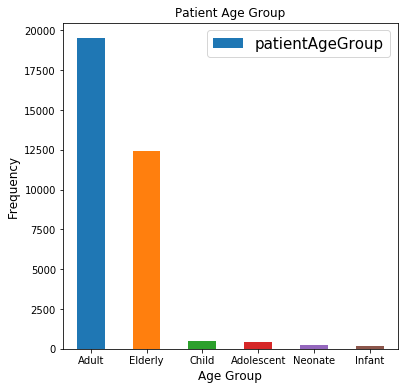

In [167]:
plot1 = faers_df_2018q4['patientAgeGroup'].value_counts().\
plot(kind='bar', title ="Patient Age Group", figsize=(6, 6), legend=True, fontsize=10)
plot1.set_xlabel("Age Group", fontsize=12)
plot1.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [227]:
faers_df_2018q4['patientAgeGroup'].value_counts()

Adult         19512
Elderly       12401
Child           471
Adolescent      396
Neonate         257
Infant          165
Name: patientAgeGroup, dtype: int64

-  Patient sex

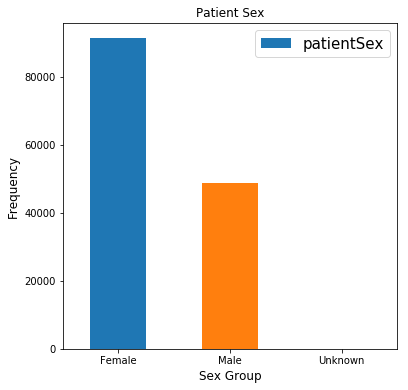

In [170]:
plot1 = faers_df_2018q4['patientSex'].value_counts().\
plot(kind='bar', title ="Patient Sex", figsize=(6, 6), legend=True, fontsize=10)
plot1.set_xlabel("Sex Group", fontsize=12)
plot1.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [226]:
faers_df_2018q4['patientSex'].value_counts()

Female     91390
Male       48719
Unknown       13
Name: patientSex, dtype: int64

-  Reaction outcome

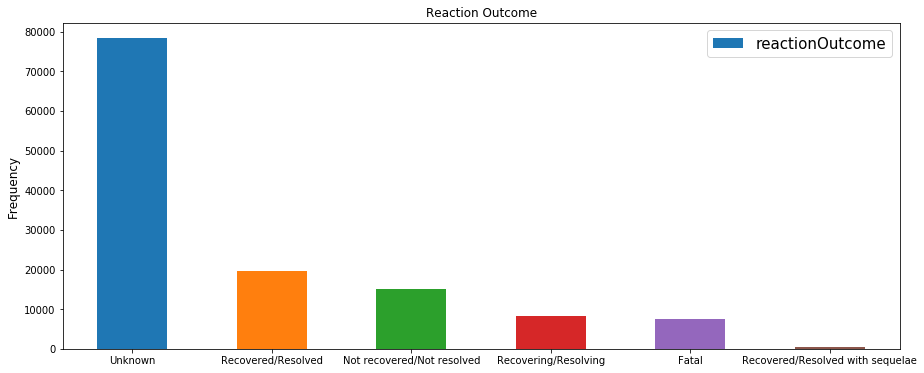

In [199]:
plot1 = faers_df_2018q4['reactionOutcome'].value_counts().\
plot(kind='bar', title ="Reaction Outcome", figsize=(15, 6), legend=True, fontsize=10)
# plot1.set_xlabel("Outcome Group", fontsize=12)
plot1.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [225]:
faers_df_2018q4['reactionOutcome'].value_counts()

Unknown                             78354
Recovered/Resolved                  19733
Not recovered/Not resolved          15095
Recovering/Resolving                 8231
Fatal                                7441
Recovered/Resolved with sequelae      569
Name: reactionOutcome, dtype: int64

-  Reaction Med Drapt

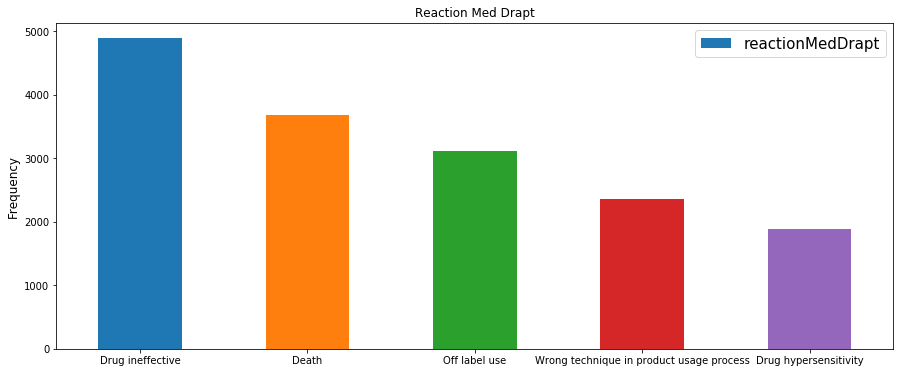

In [234]:
plot1 = faers_df_2018q4['reactionMedDrapt'].value_counts().head(5).\
plot(kind='bar', title ="Reaction Med Drapt", figsize=(15, 6), legend=True, fontsize=10)
# plot1.set_xlabel("Outcome Group", fontsize=12)
plot1.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [235]:
faers_df_2018q4['reactionMedDrapt'].value_counts().head(5)

Drug ineffective                            4888
Death                                       3679
Off label use                               3115
Wrong technique in product usage process    2361
Drug hypersensitivity                       1888
Name: reactionMedDrapt, dtype: int64

-  Active Substance

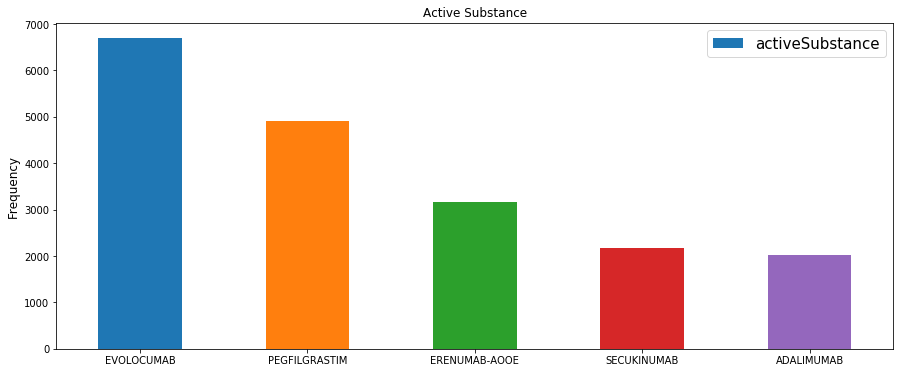

In [237]:
plot1 = faers_df_2018q4['activeSubstance'].value_counts().head(5).\
plot(kind='bar', title ="Active Substance", figsize=(15, 6), legend=True, fontsize=10)
# plot1.set_xlabel("Outcome Group", fontsize=12)
plot1.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [238]:
faers_df_2018q4['activeSubstance'].value_counts().head(5)

EVOLOCUMAB       6694
PEGFILGRASTIM    4900
ERENUMAB-AOOE    3167
SECUKINUMAB      2165
ADALIMUMAB       2020
Name: activeSubstance, dtype: int64

In [232]:
# faers_df_2018q4[(faers_df_2018q4['activeSubstance'] == 'PEGFILGRASTIM')]['drugIndication']

-  Poduct

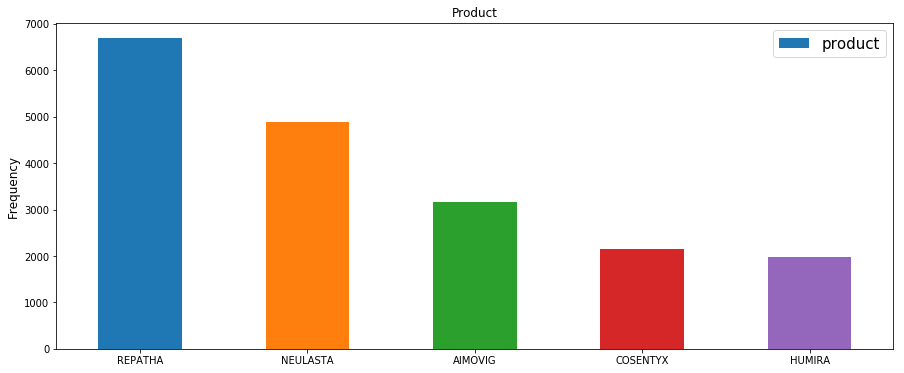

In [241]:
plot1 = faers_df_2018q4['product'].value_counts().head(5).\
plot(kind='bar', title ="Product", figsize=(15, 6), legend=True, fontsize=10)
# plot1.set_xlabel("Outcome Group", fontsize=12)
plot1.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [240]:
faers_df_2018q4['product'].value_counts().head(5)

REPATHA     6693
NEULASTA    4882
AIMOVIG     3167
COSENTYX    2140
HUMIRA      1983
Name: product, dtype: int64

-  Drug Chracterization

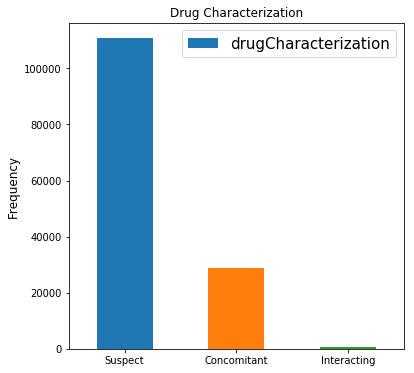

In [181]:
plot1 = faers_df_2018q4['drugCharacterization'].value_counts().\
plot(kind='bar', title ="Drug Characterization", figsize=(6, 6), legend=True, fontsize=10)
# plot1.set_xlabel("Outcome Group", fontsize=12)
plot1.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [242]:
faers_df_2018q4['drugCharacterization'].value_counts()

Suspect        110745
Concomitant     28886
Interacting       491
Name: drugCharacterization, dtype: int64

-  Drug Dosage Form

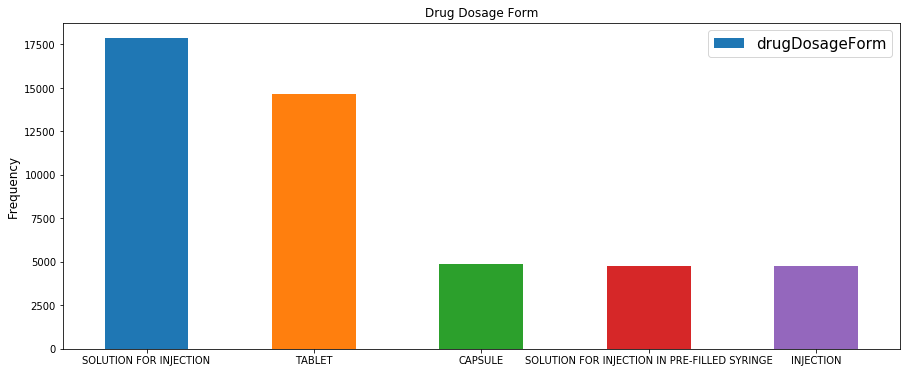

In [244]:
plot1 = faers_df_2018q4['drugDosageForm'].value_counts().head(5).\
plot(kind='bar', title ="Drug Dosage Form", figsize=(15, 6), legend=True, fontsize=10)
# plot1.set_xlabel("Outcome Group", fontsize=12)
plot1.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [245]:
faers_df_2018q4['drugDosageForm'].value_counts().head(5)

SOLUTION FOR INJECTION                          17862
TABLET                                          14623
CAPSULE                                          4861
SOLUTION FOR INJECTION IN PRE-FILLED SYRINGE     4749
INJECTION                                        4739
Name: drugDosageForm, dtype: int64

-  Drug Route ---  http://estri.ich.org/e2br22/ICH_ICSR_Specification_V2-3.pdf

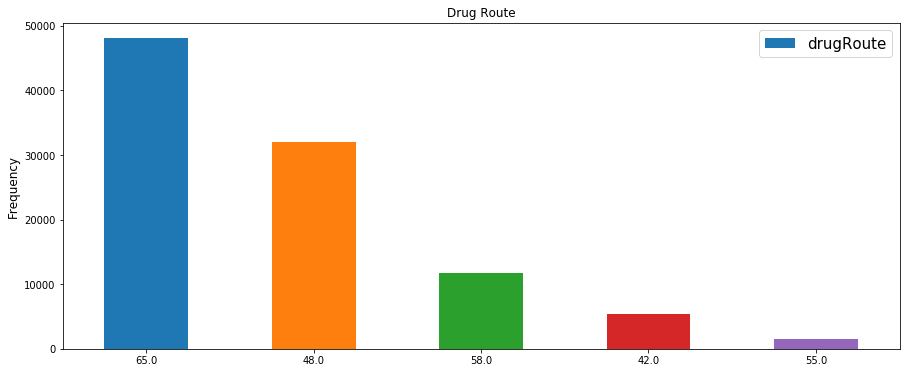

In [247]:
plot1 = faers_df_2018q4['drugRoute'].value_counts().head(5).\
plot(kind='bar', title ="Drug Route", figsize=(15, 6), legend=True, fontsize=10)
# plot1.set_xlabel("Outcome Group", fontsize=12)
plot1.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

65: unknown; 48: oral; 58: subcutaneous; 42: intravenous (not otherwise specified); 55: pulmonary;
41: intravenous drip; 30: intramuscular; 47: ophthalmic; 61: topical; 15: intra-uterine

In [248]:
faers_df_2018q4['drugRoute'].value_counts().head(5)

65.0    48084
48.0    31951
58.0    11718
42.0     5426
55.0     1586
Name: drugRoute, dtype: int64